## EDA Practice
---
This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions.

Using two sets of data - SAT scores, & Recreational Drug Usage

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import pprint
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from scipy.stats import norm

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

## Loading the dataset and describing it

In [57]:
sat_scores_path = '../Project-2/sat_scores.csv'

In [62]:
# Reading data and creating a list of rows
raw_data = []

with open(sat_scores_path, 'r') as f:
    rows = csv.reader(f)
    for row in rows:
#         row = [row.replace('\n', '')]
        raw_data.append(row)
# Closing file
f.close()

In [63]:
# Checking first two rows of data.
raw_data[0:2]

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510']]

In [64]:
# Splitting header and data rows to create dictionary.
header = raw_data[0]
data = raw_data[1:]

print(header)
data[0:5]

['State', 'Rate', 'Verbal', 'Math']


[['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516']]

In [65]:
#Creating SAT dictionary
sat_data = {}

for index, column_name in enumerate(header):
    sat_data[column_name] = []
    for row in data:
        sat_data[column_name].append(row[index])

### Making a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

In [66]:
# DataFrame using SAT dictionary
SAT_dict_df = pd.DataFrame.from_dict(sat_data)

In [67]:
SAT_dict_df.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [47]:
SAT_dict_df.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [68]:
# DataFrame using SAT .csv
SAT_csv_df = pd.read_csv(sat_scores_path)

In [61]:
SAT_csv_df.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [39]:
# Checking the datatypes
print(SAT_csv_df.dtypes)

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


In [11]:
SAT_csv_df.index = SAT_csv_df['State']

In [12]:
SAT_csv_df.head()

,State,Rate,Verbal,Math
State,,,,
CT,CT,82,509,510
NJ,NJ,81,499,513
MA,MA,79,511,515
NY,NY,77,495,505
NH,NH,72,520,516


In [12]:
# SAT_csv_df = SAT_csv_df.drop(columns='State')
# SAT_csv_df.head()

In [13]:
SAT_csv_df.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


Formating between the DataFrame techniques is the same, including the addition of an indexing column. 
However, the data rows for the pandas DataFrame that originated directly from .csv has data-types of integer.

Looking at the first ten rows of the DataFrame, it looks like the data shows the rate of student attendance for the SAT exams per state. We also have the average Verbal and Math scores of each state. 

In [14]:
SAT_csv_df.head(10)

,State,Rate,Verbal,Math
State,,,,
CT,CT,82,509,510
NJ,NJ,81,499,513
MA,MA,79,511,515
NY,NY,77,495,505
NH,NH,72,520,516
RI,RI,71,501,499
PA,PA,71,500,499
VT,VT,69,511,506
ME,ME,69,506,500


## Creating a "data dictionary" based on the data

## Plotting the data using seaborn plotting the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way we can actually see the counts within bins. 

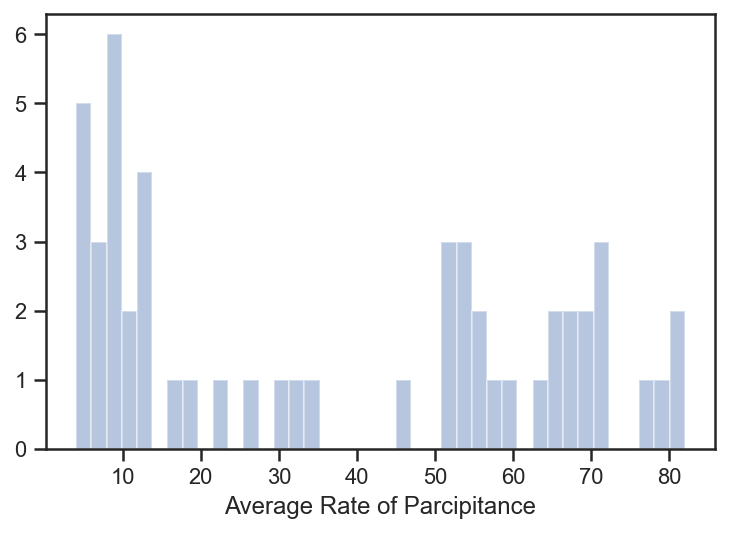

In [15]:
sns.distplot(SAT_csv_df['Rate'], kde = False, bins=40, axlabel='Average Rate of Parcipitance' )

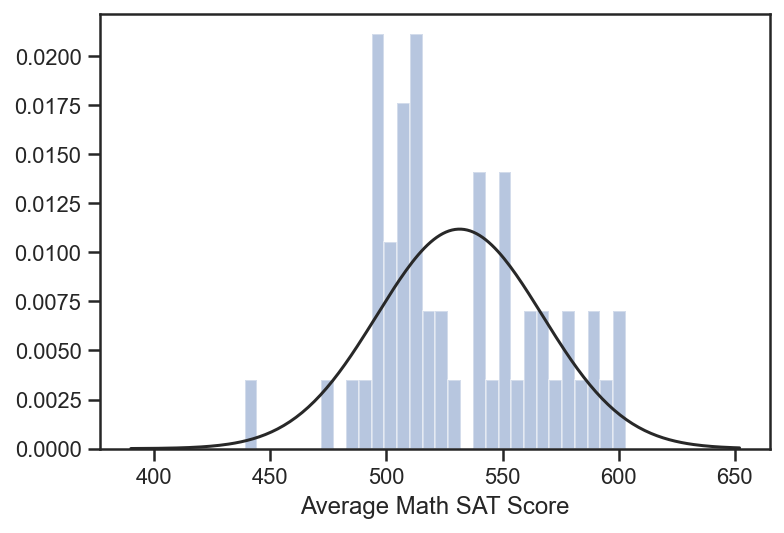

In [16]:
sns.distplot(SAT_csv_df['Math'], kde = False, bins=30, axlabel='Average Math SAT Score', fit=norm )

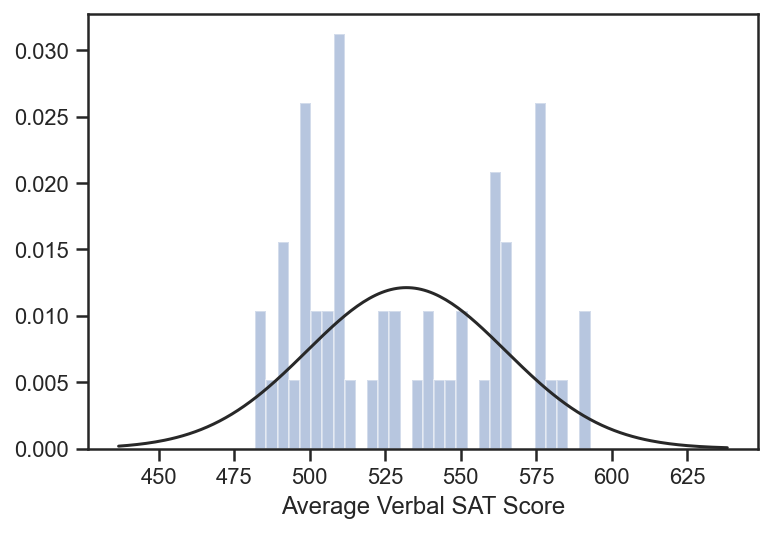

In [17]:
sns.distplot(SAT_csv_df['Verbal'], kde = False, bins=30, axlabel='Average Verbal SAT Score', fit=norm )

### Using seaborn's `pairplot`, to show the joint distributions for each of `Rate`, `Math`, and `Verbal`

In [18]:
SAT_csv_df.head()

,State,Rate,Verbal,Math
State,,,,
CT,CT,82,509,510
NJ,NJ,81,499,513
MA,MA,79,511,515
NY,NY,77,495,505
NH,NH,72,520,516


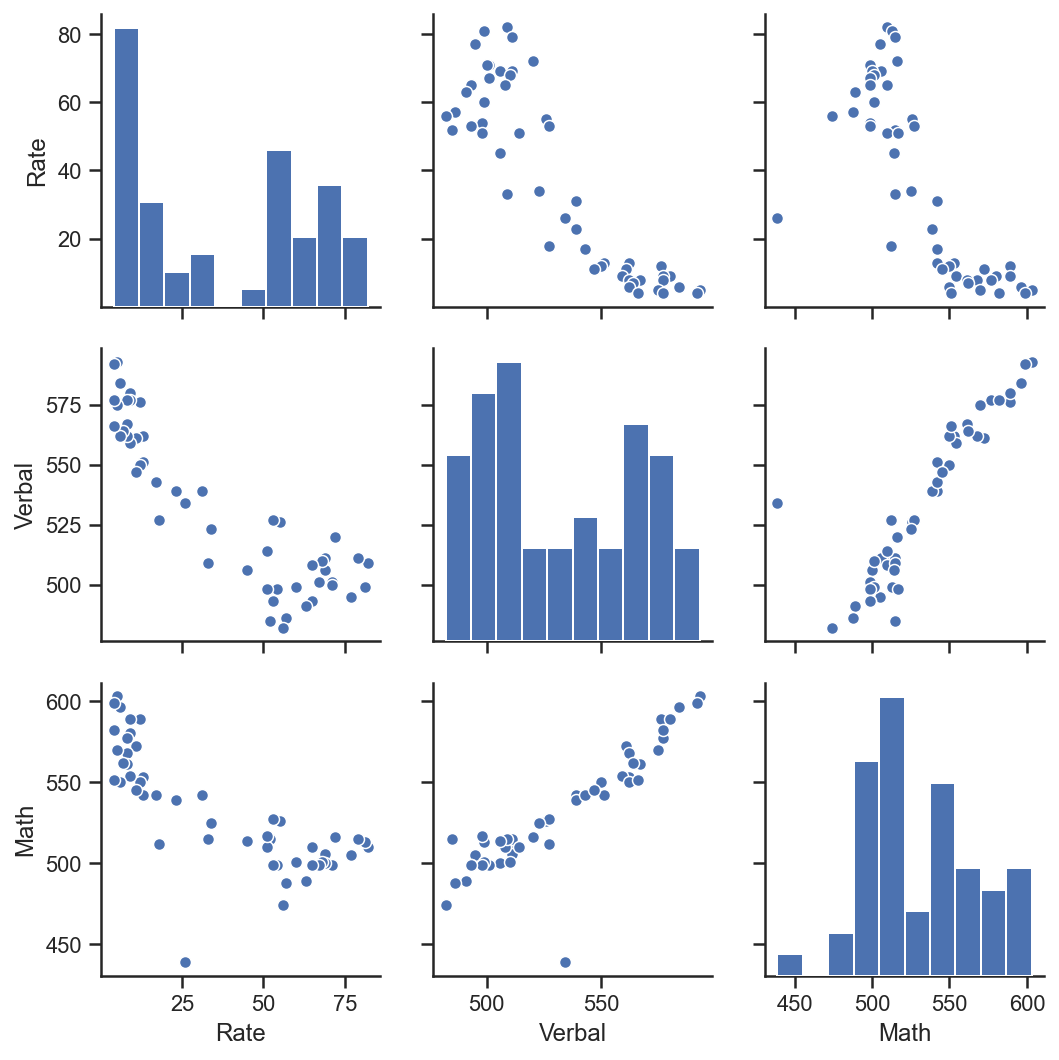

In [24]:
sns.pairplot(SAT_csv_df)

The `distplot` shows us the individual variables `Rate`, `Verbal`, `Math` distributions. 

Whereas, the pairplots show us the correlation between each value. The hue adds another dimension to the plots - overlaying the rate of 
attendance on the plots.

## Plotting the data using built-in pandas functions.
---

### A stacked histogram with `Verbal` and `Math` using pandas

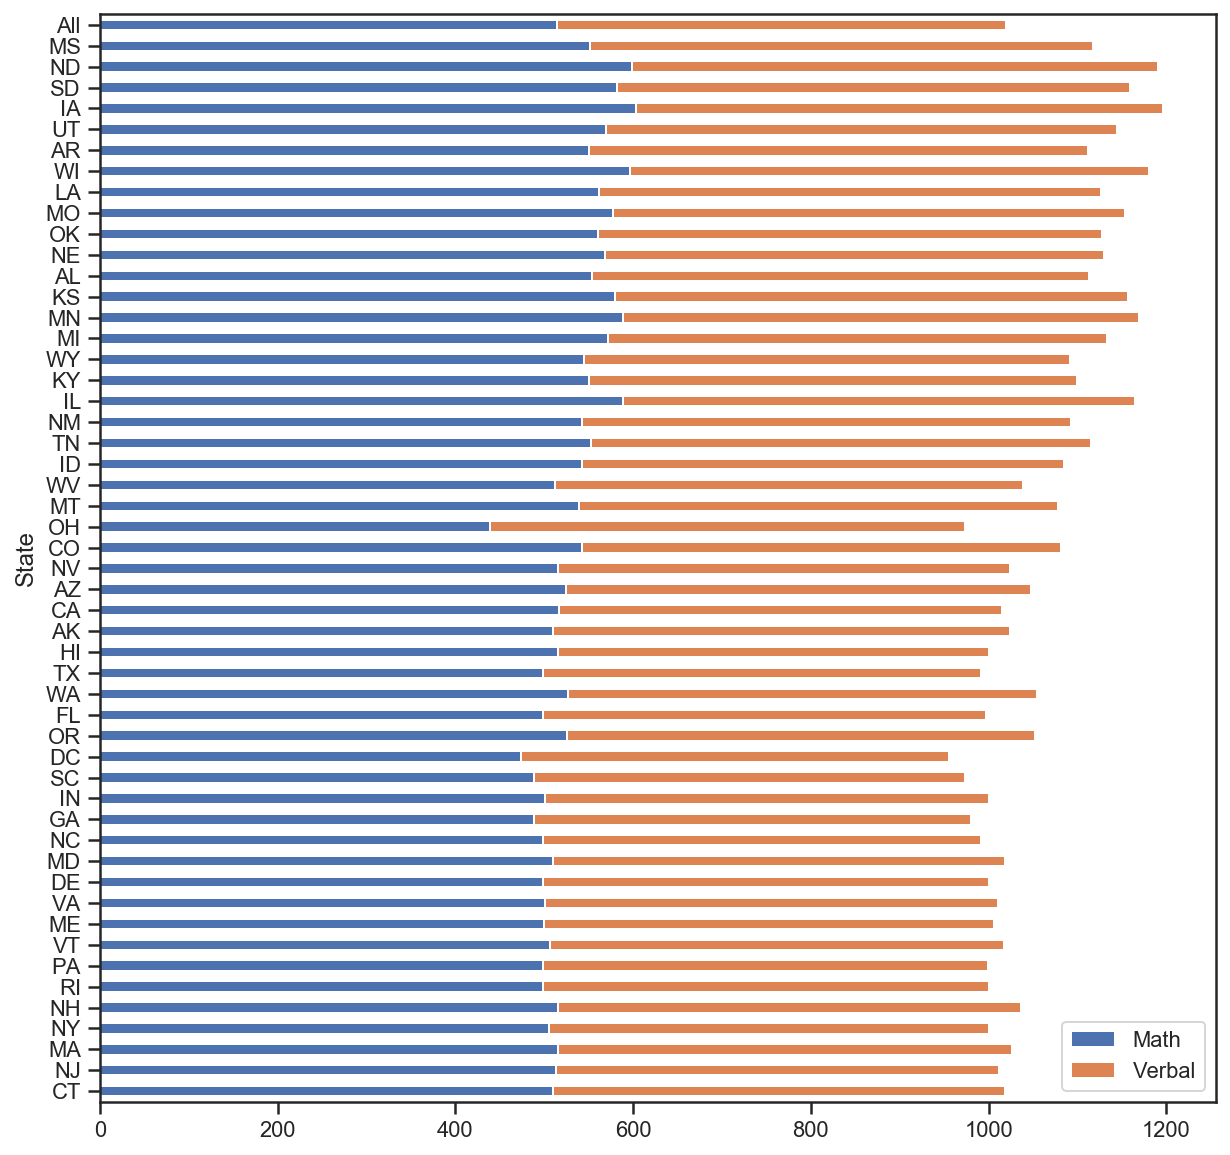

In [48]:
SAT_csv_df[['Math', 'Verbal']].plot(kind='barh', by='State', stacked=True, figsize=(10,10))

### Plotting `Verbal` and `Math` on the same chart using boxplots

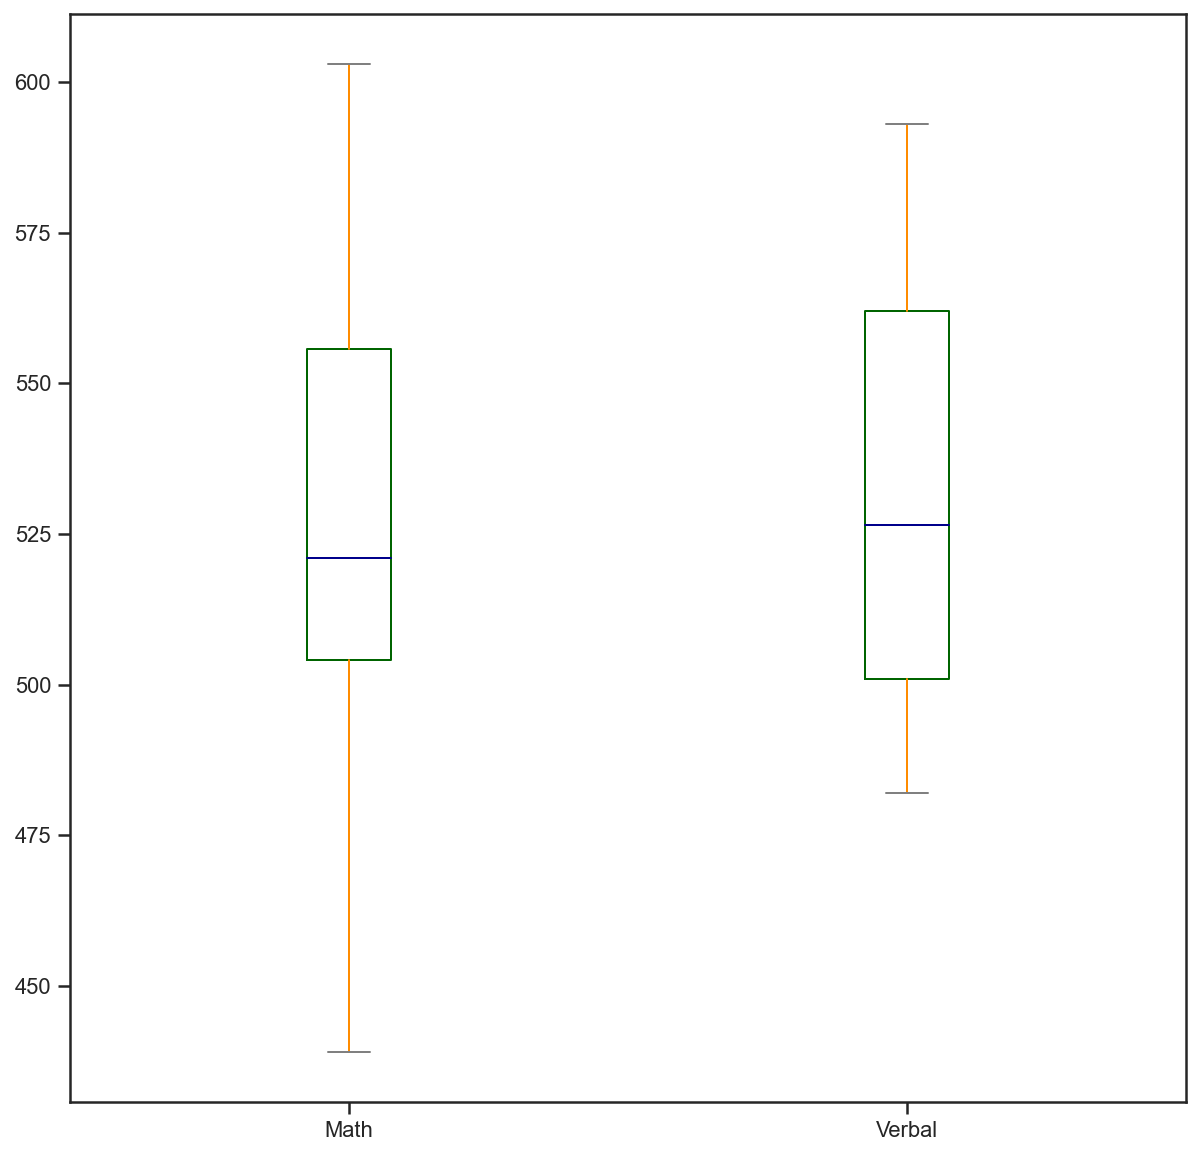

In [25]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}

SAT_csv_df[['Math', 'Verbal']].plot(kind='box', color = color, figsize=(10,10))

Plotting a box-plot of `Rate` on the same chart as `Math` & `Verbal` produces an unintuitive chart to read,
as the scaling of `Rate` is a percentage rather than a scalar with a maximum value of 800.

### Plotting `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Changing the variables so we can plot a more intuitve chart.

In [26]:
### Changing the Math scores to percentages.
SAT_sub_4_math = ((SAT_csv_df[['Math']] - SAT_csv_df['Math'].min())/(SAT_csv_df['Math'].max() - SAT_csv_df['Math'].min()))*100
SAT_sub_4_math.head()

,Math
State,
CT,43.292683
NJ,45.121951
MA,46.341463
NY,40.243902
NH,46.951220


In [27]:
### Changeing the Verbal scores to percentages
SAT_sub_4_verbal = ((SAT_csv_df[['Verbal']] - SAT_csv_df['Verbal'].min())/(SAT_csv_df['Verbal'].max() - SAT_csv_df['Verbal'].min()))*100
SAT_sub_4_verbal.head()

,Verbal
State,
CT,24.324324
NJ,15.315315
MA,26.126126
NY,11.711712
NH,34.234234


In [40]:
### Consolidating the percentage Math, Verbal and original Rate percentages to one DataFrame.
SAT_sub_4 = pd.DataFrame(SAT_sub_4_math, columns={'Math':[SAT_sub_4_math]})
SAT_sub_4['Verbal'] = SAT_sub_4_verbal
SAT_sub_4['Rate'] = SAT_csv_df['Rate']
SAT_sub_4.head()

,Math,Verbal,Rate
State,,,
CT,43.292683,24.324324,82
NJ,45.121951,15.315315,81
MA,46.341463,26.126126,79
NY,40.243902,11.711712,77
NH,46.951220,34.234234,72


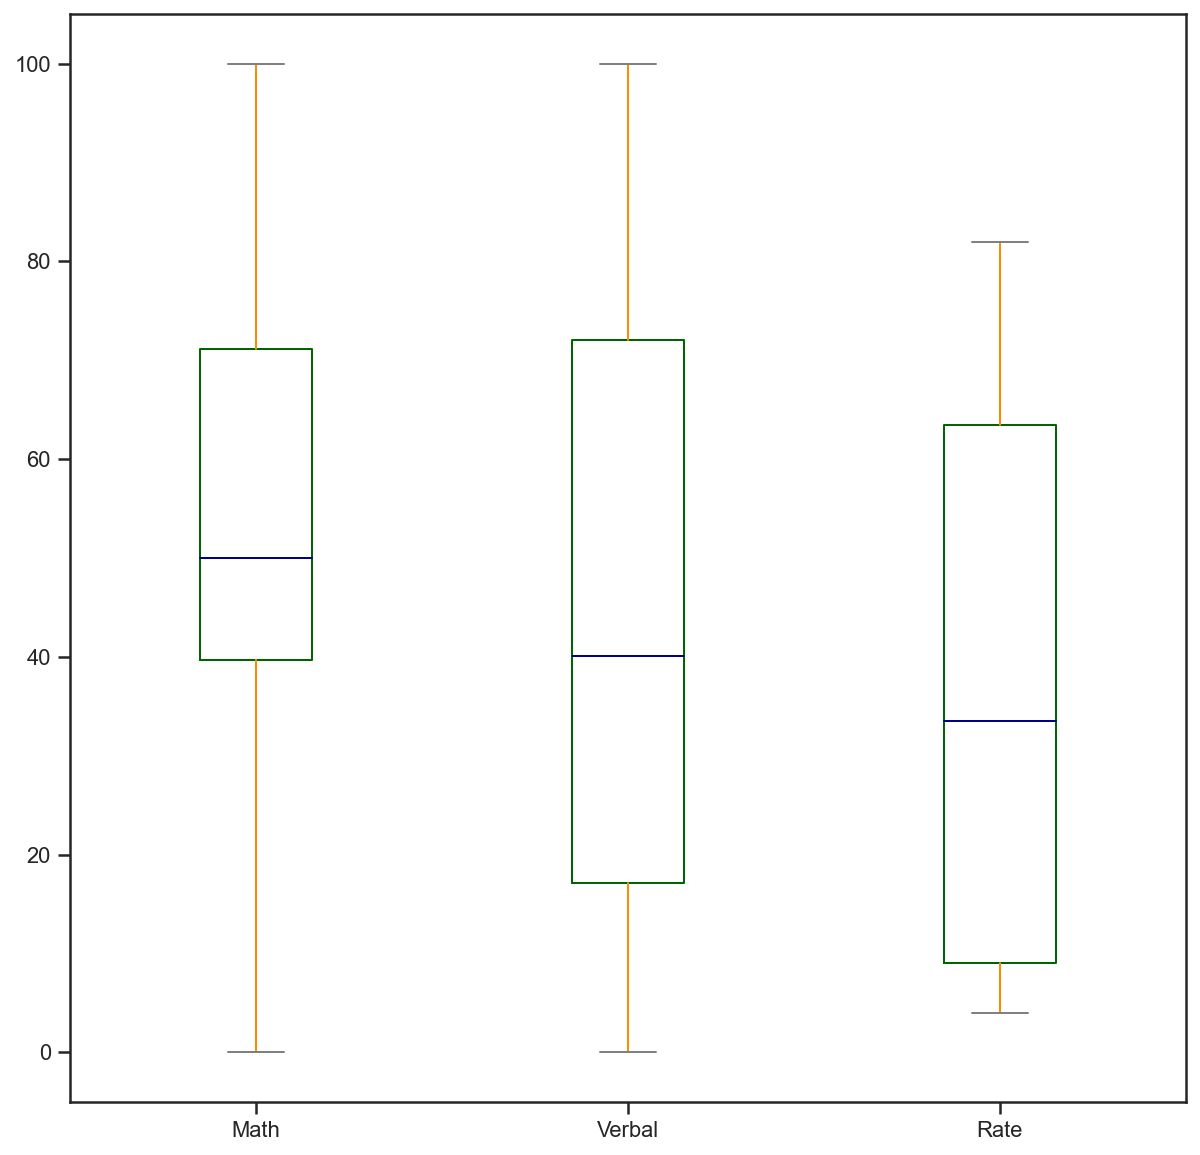

In [41]:
### Plotting the new dataframe as an appropriatley scaled boxplot. 
SAT_sub_4[['Math', 'Verbal', 'Rate']].plot(kind='box', color = color, figsize=(10,10))

## Creating and examining subsets of the data
---

### Finding a list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

In [42]:
# Mean of the Verbal scores
SAT_csv_df.iloc[:,2].mean()

532.0192307692307

In [230]:
SAT_Verbal_Mean = SAT_csv_df.iloc[:,2].agg(lambda x: (x > x.mean()).sum())
print('Count of states where Verbal score is above the mean;',SAT_Verbal_Mean)

Count of states where Verbal score is above the mean; 24


In [238]:
verbal_mean = SAT_csv_df[SAT_csv_df.iloc[:,2] >= SAT_csv_df.iloc[:,2].mean()]
verbal_mean.shape

(24, 5)

### Finding the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

In [239]:
SAT_Verbal_Median = SAT_csv_df.iloc[:,2].agg(lambda x: (x > x.median()).sum())
print('Count of states where Verbal score is above the median;',SAT_Verbal_Median)

Count of states where Verbal score is above the median; 26


In [240]:
verbal_median = SAT_csv_df[SAT_csv_df.iloc[:,2] >= SAT_csv_df.iloc[:,2].median()]
verbal_median.shape

(26, 5)

### Creating a column that is the difference between the `Verbal` and `Math` scores

In [43]:
SAT_csv_df['Verbal - Math'] = SAT_csv_df.iloc[:,2] - SAT_csv_df.iloc[:,3]
SAT_csv_df.head()

,State,Rate,Verbal,Math,Verbal - Math
State,,,,,
CT,CT,82,509,510,-1
NJ,NJ,81,499,513,-14
MA,MA,79,511,515,-4
NY,NY,77,495,505,-10
NH,NH,72,520,516,4


### Creating two new DataFrames showing states with the greatest difference between scores

The first DataFrame is the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It is sorted appropriately to show the ranking of states.

In [44]:
SAT_verbal_great = SAT_csv_df.sort_values(by=['Verbal - Math'], ascending=False)
SAT_verbal_great.head(10)

,State,Rate,Verbal,Math,Verbal - Math
State,,,,,
OH,OH,26,534,439,95
MS,MS,4,566,551,15
WV,WV,18,527,512,15
AR,AR,6,562,550,12
NM,NM,13,551,542,9
TN,TN,13,562,553,9
VA,VA,68,510,501,9
DC,DC,56,482,474,8
ME,ME,69,506,500,6


The second DataFrame is the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this is sorted appropriately to show rank.

In [46]:
SAT_math_great = SAT_csv_df.sort_values(by=['Verbal - Math'], ascending=True)
SAT_math_great.head(10)

,State,Rate,Verbal,Math,Verbal - Math
State,,,,,
HI,HI,52,485,515,-30
CA,CA,51,498,517,-19
NJ,NJ,81,499,513,-14
IL,IL,12,576,589,-13
WI,WI,6,584,596,-12
MI,MI,11,561,572,-11
NY,NY,77,495,505,-10
IA,IA,5,593,603,-10
MN,MN,9,580,589,-9


In [48]:
SAT_verbal_great.head(3)

,State,Rate,Verbal,Math,Verbal - Math
State,,,,,
OH,OH,26,534,439,95
MS,MS,4,566,551,15
WV,WV,18,527,512,15


In [49]:
SAT_math_great.head(3)

,State,Rate,Verbal,Math,Verbal - Math
State,,,,,
HI,HI,52,485,515,-30
CA,CA,51,498,517,-19
NJ,NJ,81,499,513,-14


## Examining the summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### Creating the correlation matrix of the variables (excluding `State`).

In [50]:
SAT_correlations = SAT_csv_df[['Verbal','Math','Rate']].corr()
SAT_correlations

,Verbal,Math,Rate
Verbal,1.000000,0.899871,-0.886432
Math,0.899871,1.000000,-0.773746
Rate,-0.886432,-0.773746,1.000000


The correlation shows the strength and direction of correlation between each variable. The diagonal values
are all 1.000000 as they are the correlation of the variables with themselves. All of the variables have a 
negative correlation other than Math against Verbal. An interpretation of this shows us that the Math scores 
increase as the Verbal scores do.

### Using pandas'  `.describe()` built-in function

In [51]:
SAT_csv_df[['Verbal','Math','Rate']].describe()

,Verbal,Math,Rate
count,52.000000,52.000000,52.000000
mean,532.019231,531.500000,37.153846
std,33.236225,36.014975,27.301788
min,482.000000,439.000000,4.000000
25%,501.000000,504.000000,9.000000
50%,526.500000,521.000000,33.500000
75%,562.000000,555.750000,63.500000
max,593.000000,603.000000,82.000000


Count: The count of values in the variable.  
Mean: The sum of all values in the variable divided by the count.  
Std: The squared sum of each value in the variable less the mean, divided by the count less one. This shows by how
much the values differ from the variables mean.  
Min: The minimum value within the variable.  
25%: The first quartile of the values. Calculated by taking the median of 50% of the values that lay below the mean.  
50%: The second quartile of the values. Otherwise known as the median - the middle value.  
75%: The third quartile of the values. Calculated by taking the median of 50% of the values that lay above the mean.  
Max: The maximum value within the variable.  

### Assigning and printing the _covariance_ matrix for the dataset

In [61]:
SAT_csv_df[['Verbal','Math','Rate']].cov()

,Verbal,Math,Rate
Verbal,1104.646682,1077.147059,-804.355958
Math,1077.147059,1297.078431,-760.803922
Rate,-804.355958,-760.803922,745.387632


The process to convert the covariance into the correlation of two variables, is to divide the covaraince by the
multiple of the two respective standard deviations of the variables.

Covariance is a measure of relatedness between the variables. It is not very interpretable as it is relative
to the values of the variances. The covariance value shows us if there is a positive or negative trend. It can 
not show us how steep the trending line is, or how close the data points are to it. 
A correlation matrix is preferred as it creates a standardised absolute measure with which all relationships 
can be compared. The correlation value can show us the steepness of the trending line, and how close the values 
are to the trending line.

## Performing EDA on "drug use by age" data.

---

Loading the data using pandas

In [2]:
drug = pd.read_csv('../Project-2/drug-use-by-age.csv')
drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [3]:
### Creating temporary bins for analysis.
drug['age_bin'] = pd.Series([12,13,14,15,16,17,18,19,20,21,22,24,26,30,35,50,65])
drug['age_bin']

0     12
1     13
2     14
3     15
4     16
5     17
6     18
7     19
8     20
9     21
10    22
11    24
12    26
13    30
14    35
15    50
16    65
Name: age_bin, dtype: int64

In [4]:
### Checking bins
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        17 non-null     object 
 8   crack-use                17 non-null     float64
 9   crack-frequency          17 non-null     object 
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         17 non-null     object 
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 

The above shows that there are unequal counts of non-null values in each column.

### Checking for weird values

In [5]:
drug['cocaine-frequency'].unique()

array(['5.0', '1.0', '5.5', '4.0', '7.0', '8.0', '6.0', '15.0', '36.0',
       '-'], dtype=object)

In [6]:
drug['heroin-frequency'].unique()

array(['35.5', '-', '2.0', '1.0', '66.5', '64.0', '46.0', '180.0', '45.0',
       '30.0', '57.5', '88.0', '50.0', '66.0', '280.0', '41.0', '120.0'],
      dtype=object)

In [7]:
drug['inhalant-frequency'].unique()

array(['19.0', '12.0', '5.0', '5.5', '3.0', '4.0', '2.0', '3.5', '10.0',
       '13.5', '-'], dtype=object)

In [8]:
drug['oxycontin-frequency'].unique()

array(['24.5', '41.0', '4.5', '3.0', '4.0', '6.0', '7.0', '7.5', '12.0',
       '13.5', '17.5', '20.0', '46.0', '5.0', '-'], dtype=object)

In [9]:
drug['meth-frequency'].unique()

array(['-', '5.0', '24.0', '10.5', '36.0', '48.0', '12.0', '105.0', '2.0',
       '46.0', '21.0', '30.0', '54.0', '104.0'], dtype=object)

### Creating a mask for the wierd values

In [10]:
cocaine_freq_mask = drug['cocaine-frequency'] == "-"
drug[cocaine_freq_mask]

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,age_bin
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0,65


In [11]:
crack_freq_mask = drug['crack-frequency'] == '-'
drug[crack_freq_mask]

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,age_bin
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0,12
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5,14
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0,65


In [12]:
oxycontin_freq_mask = drug['oxycontin-frequency'] == '-'
drug[oxycontin_freq_mask]

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,age_bin
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0,65


In [13]:
heroin_freq_mask = drug['heroin-frequency'] == '-'
drug[heroin_freq_mask]

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,age_bin
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0,13


In [14]:
inhalant_freq_mask = drug['inhalant-frequency'] == '-'
drug[inhalant_freq_mask]

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,age_bin
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0,65


In [15]:
meth_freq_mask = drug['meth-frequency'] == '-'
drug[meth_freq_mask]

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,age_bin
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0,12
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0,65


### Replacing weird values with np.nan

In [16]:
drug.loc[cocaine_freq_mask,'cocaine-frequency'] = np.nan
drug['cocaine-frequency'] = drug['cocaine-frequency'].map(lambda x: float(x))

drug.loc[crack_freq_mask,'crack-frequency'] = np.nan
drug['crack-frequency'] = drug['crack-frequency'].map(lambda x: float(x))

drug.loc[heroin_freq_mask,'heroin-frequency'] = np.nan
drug['heroin-frequency'] = drug['heroin-frequency'].map(lambda x: float(x))

drug.loc[inhalant_freq_mask,'inhalant-frequency'] = np.nan
drug['inhalant-frequency'] = drug['inhalant-frequency'].map(lambda x: float(x))

drug.loc[oxycontin_freq_mask,'oxycontin-frequency'] = np.nan
drug['oxycontin-frequency'] = drug['oxycontin-frequency'].map(lambda x: float(x))

drug.loc[meth_freq_mask,'meth-frequency'] = np.nan
drug['meth-frequency'] = drug['meth-frequency'].map(lambda x: float(x))

drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        16 non-null     float64
 8   crack-use                17 non-null     float64
 9   crack-frequency          14 non-null     float64
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         16 non-null     float64
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 

### A high-level, initial overview of the data

In [22]:
# Plotting the correlations of the drug dataframe.
drug_correlations = drug.corr()
drug_correlations

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,age_bin
n,1.000000,0.310512,0.313431,-0.169007,0.135597,-0.021565,0.365386,0.281797,0.548114,0.007798,...,-0.024438,-0.071086,-0.102301,-0.201621,-0.114792,-0.063571,0.485909,-0.119997,0.256701,0.209636
alcohol-use,0.310512,1.000000,0.897889,0.594165,0.920425,0.773458,0.254042,0.877378,0.202732,0.677614,...,-0.052126,0.735785,-0.550501,0.582241,-0.028115,0.682531,0.282820,0.318268,0.091251,0.347178
alcohol-frequency,0.313431,0.897889,1.000000,0.260219,0.818769,0.577601,0.391981,0.785050,0.333935,0.546194,...,0.119852,0.448543,-0.415026,0.291766,0.260304,0.425153,0.253725,0.029867,0.201423,0.629531
marijuana-use,-0.169007,0.594165,0.260219,1.000000,0.615610,0.883789,-0.273950,0.620670,-0.476095,0.711613,...,-0.323519,0.935199,-0.401769,0.968096,-0.389145,0.870446,0.014585,0.616766,-0.277144,-0.365037
marijuana-frequency,0.135597,0.920425,0.818769,0.615610,1.000000,0.742598,0.250348,0.892077,0.113860,0.631789,...,0.040880,0.768339,-0.591449,0.561246,-0.069454,0.664280,0.317099,0.399124,0.048777,0.296227
cocaine-use,-0.021565,0.773458,0.577601,0.883789,0.742598,1.000000,-0.163922,0.835727,-0.339153,0.899944,...,-0.075193,0.920430,-0.294905,0.923954,-0.309286,0.889353,0.043154,0.461914,-0.159997,-0.179095
cocaine-frequency,0.365386,0.254042,0.391981,-0.273950,0.250348,-0.163922,1.000000,0.250877,0.875558,-0.206298,...,-0.236768,-0.191929,-0.144951,-0.345279,0.817772,-0.189141,0.172758,-0.126690,0.773808,0.888842
crack-use,0.281797,0.877378,0.785050,0.620670,0.892077,0.835727,0.250877,1.000000,0.173208,0.750790,...,0.056195,0.772651,-0.345668,0.618008,-0.294260,0.694324,0.281240,0.438421,0.091676,0.106592
crack-frequency,0.548114,0.202732,0.333935,-0.476095,0.113860,-0.339153,0.875558,0.173208,1.000000,-0.417148,...,-0.195650,-0.420309,-0.233501,-0.511014,0.903993,-0.395273,0.261224,-0.060603,0.611218,0.857561
heroin-use,0.007798,0.677614,0.546194,0.711613,0.631789,0.899944,-0.206298,0.750790,-0.417148,1.000000,...,0.039657,0.818583,-0.175464,0.808024,-0.277996,0.816620,-0.078088,0.333649,-0.023708,-0.184835


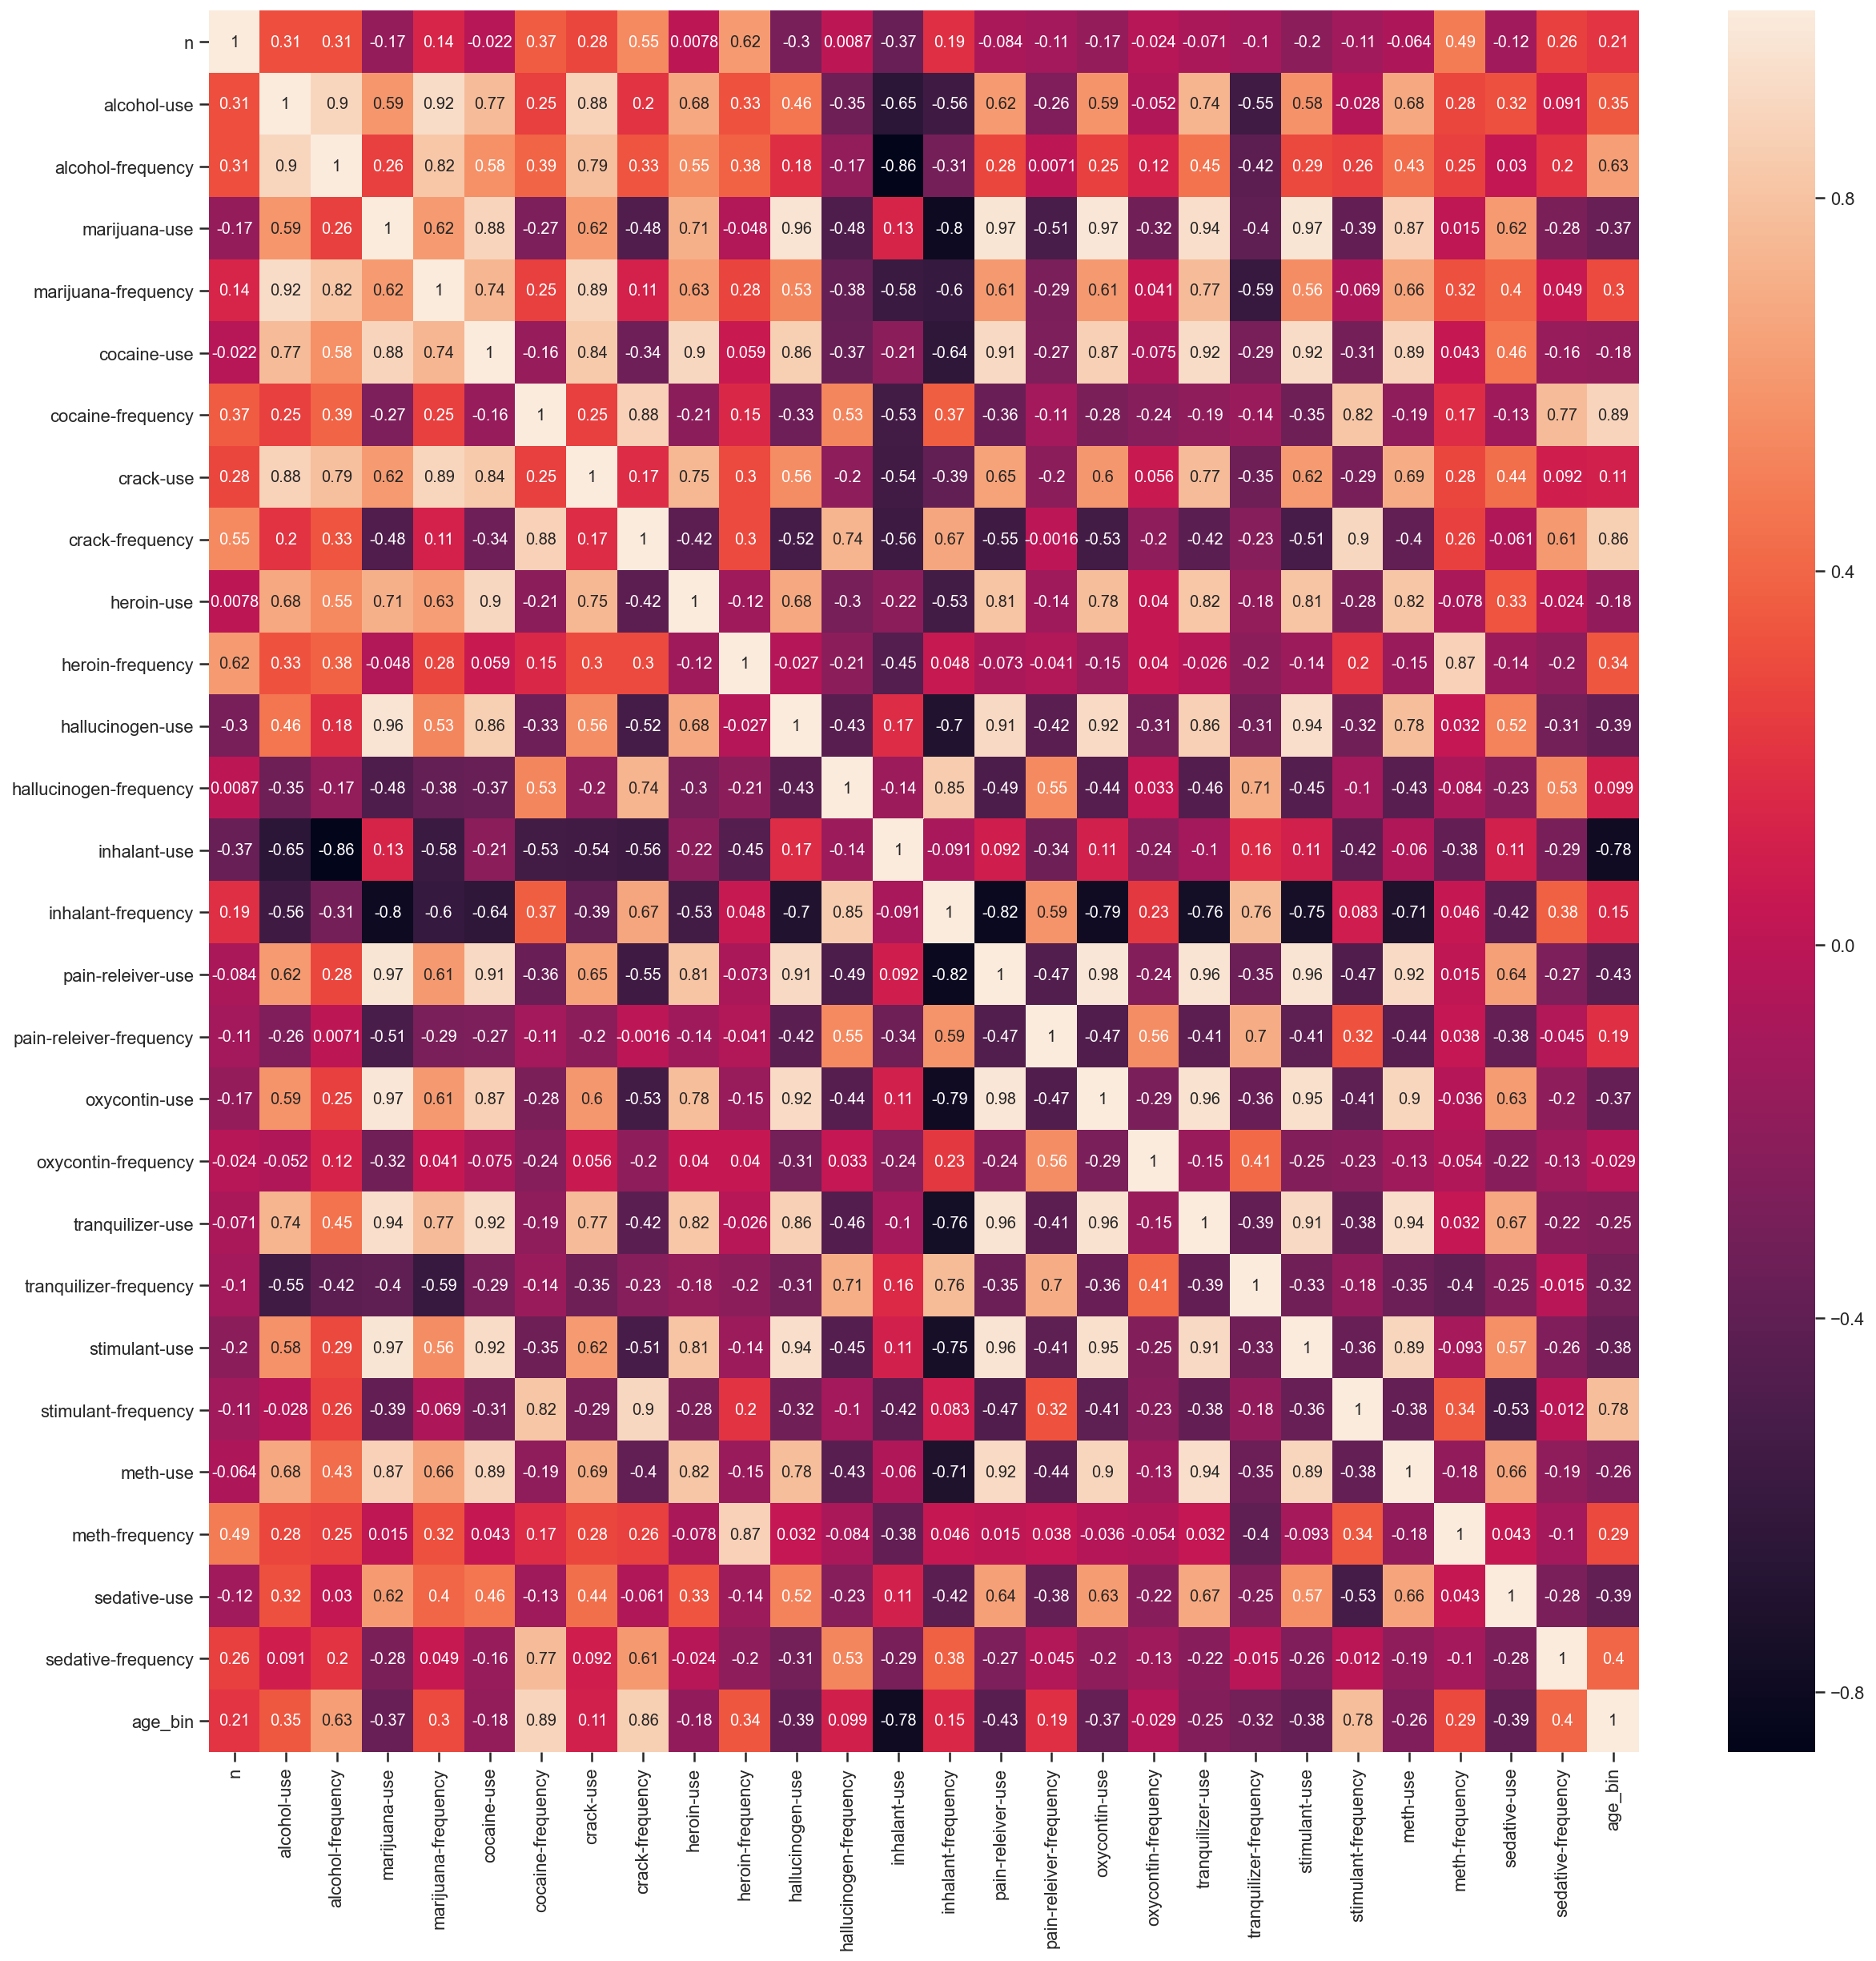

In [20]:
# Plotting the correlations on a heatmap to make it easier to identify trends with the human eye.
plt.figure(figsize=(20,20))
sns.heatmap(drug_correlations, annot=True,)

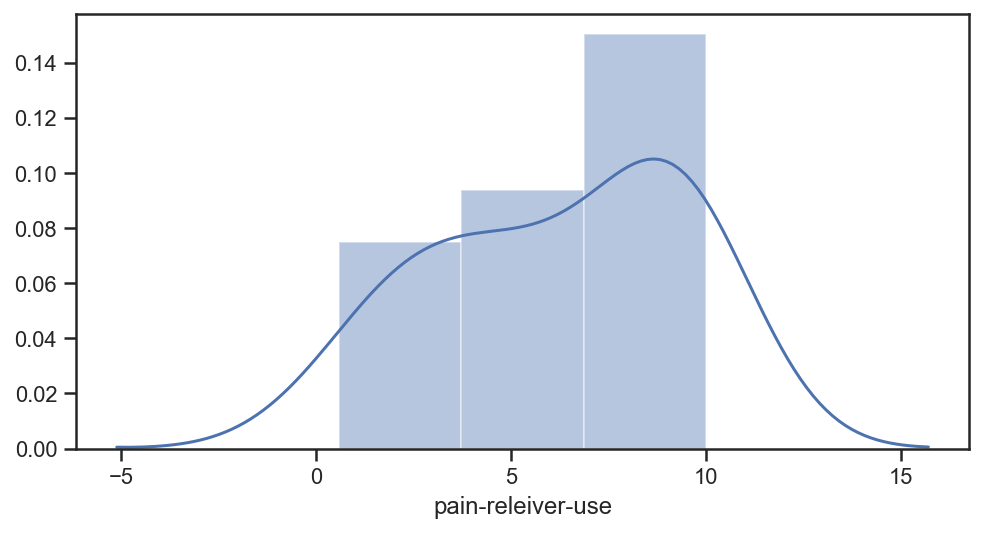

In [23]:
fig = plt.figure(figsize=(8,4))
ax = fig.gca()

ax = sns.distplot(drug['pain-releiver-use'])
plt.show()

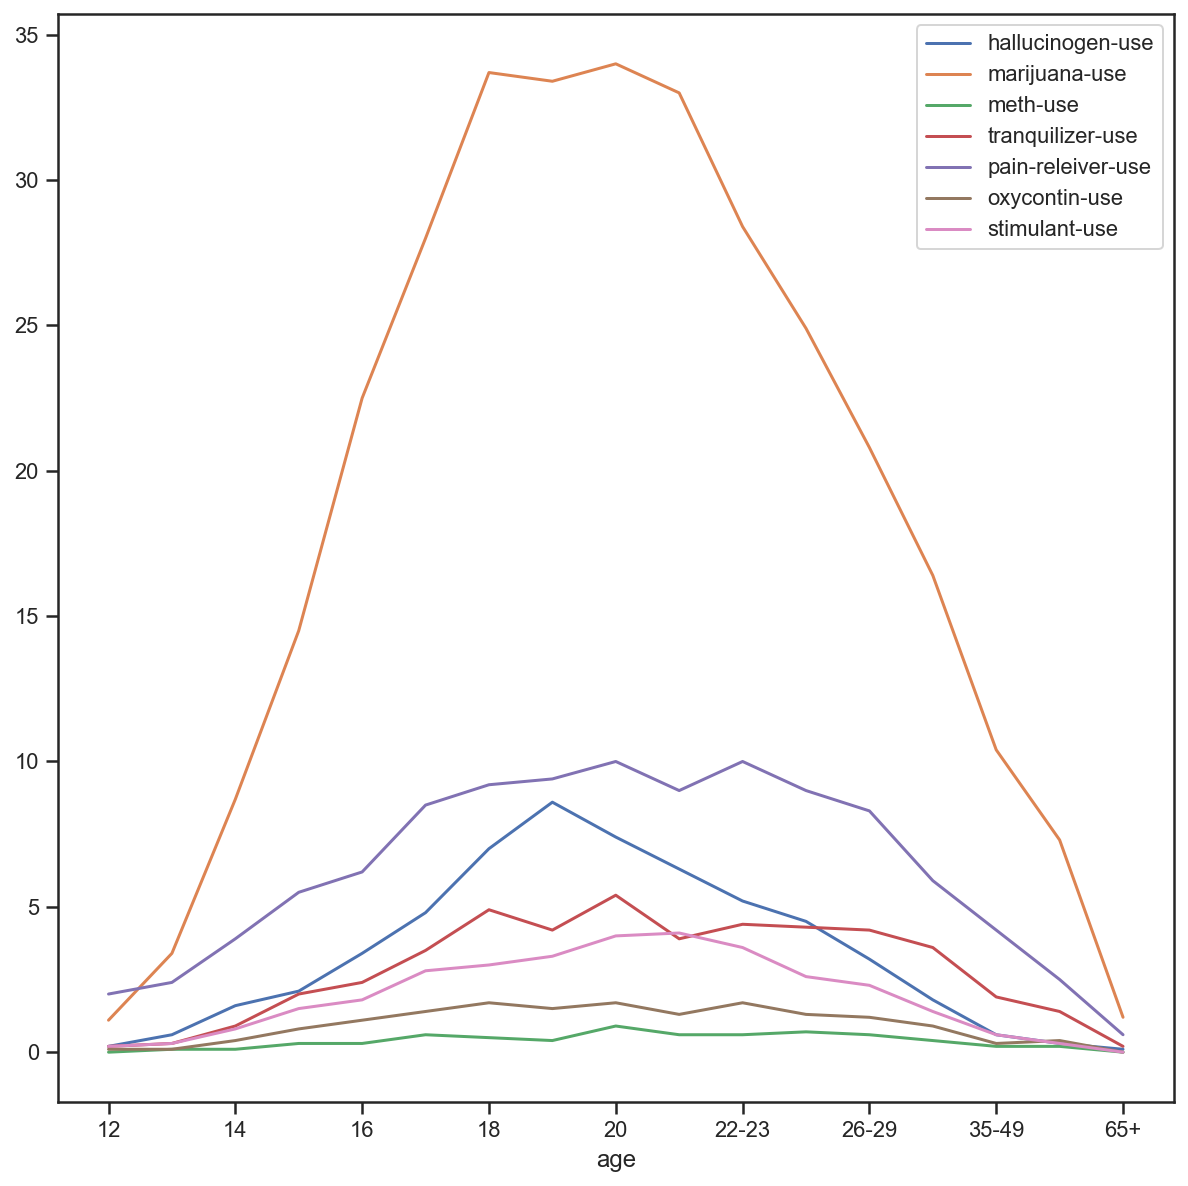

In [24]:
# Plotting each drug use category that has a correlation of >0.9 with pain-releiver-use, against age.
drug.plot(kind='line', x='age', y={'pain-releiver-use',
                                   'marijuana-use',
                                   'hallucinogen-use',
                                   'oxycontin-use',
                                   'tranquilizer-use',
                                   'stimulant-use',
                                   'meth-use',
                                  }, figsize=(10,10))

<Figure size 720x720 with 0 Axes>

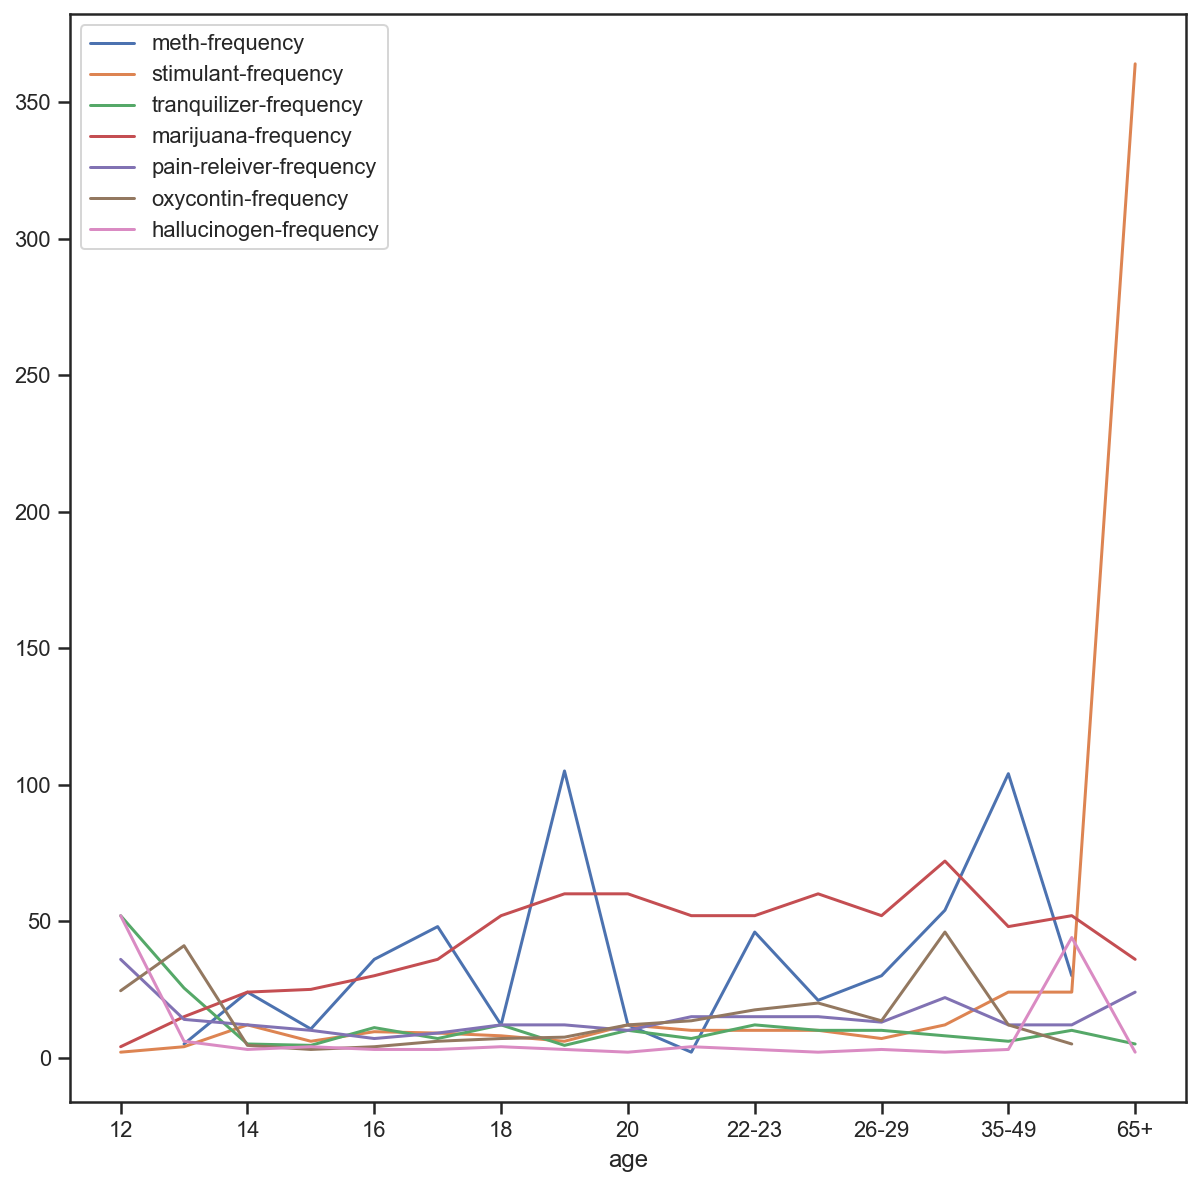

In [25]:
# Plotting each drug use category that has a correlation of >0.9 with pain-releiver-frequency, against age.
plt.figure(figsize=(10,10))
drug.plot(kind='line', x='age', y={'pain-releiver-frequency',
                                   'marijuana-frequency',
                                   'hallucinogen-frequency',
                                   'oxycontin-frequency',
                                  'tranquilizer-frequency',
                                   'stimulant-frequency',
                                   'meth-frequency',
                                  }, figsize=(10,10))

In [26]:
drug.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency', 'age_bin'],
      dtype='object')

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217:

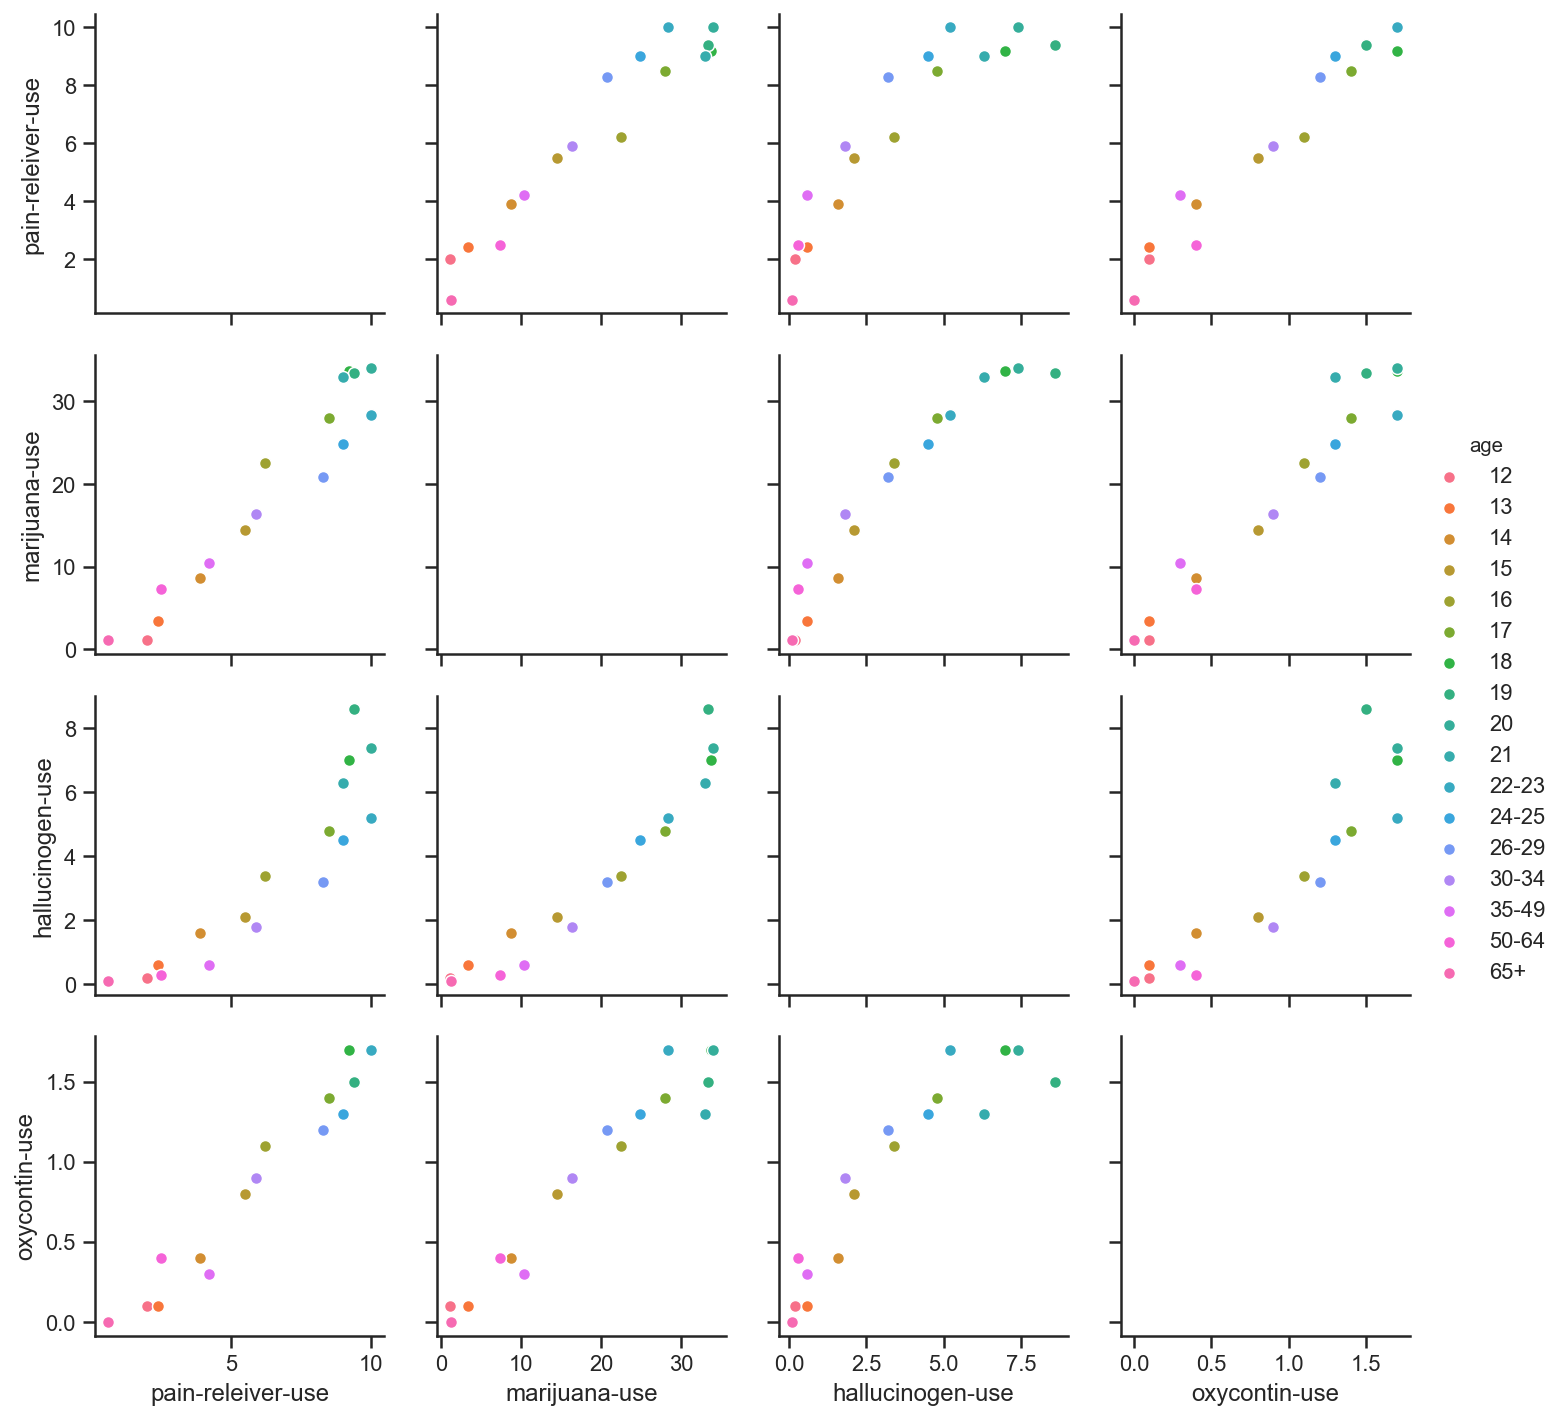

In [27]:
sns.pairplot(drug[['pain-releiver-use',
                   'marijuana-use',
                    'hallucinogen-use',
                   'oxycontin-use',
                   'age']], hue = 'age')

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


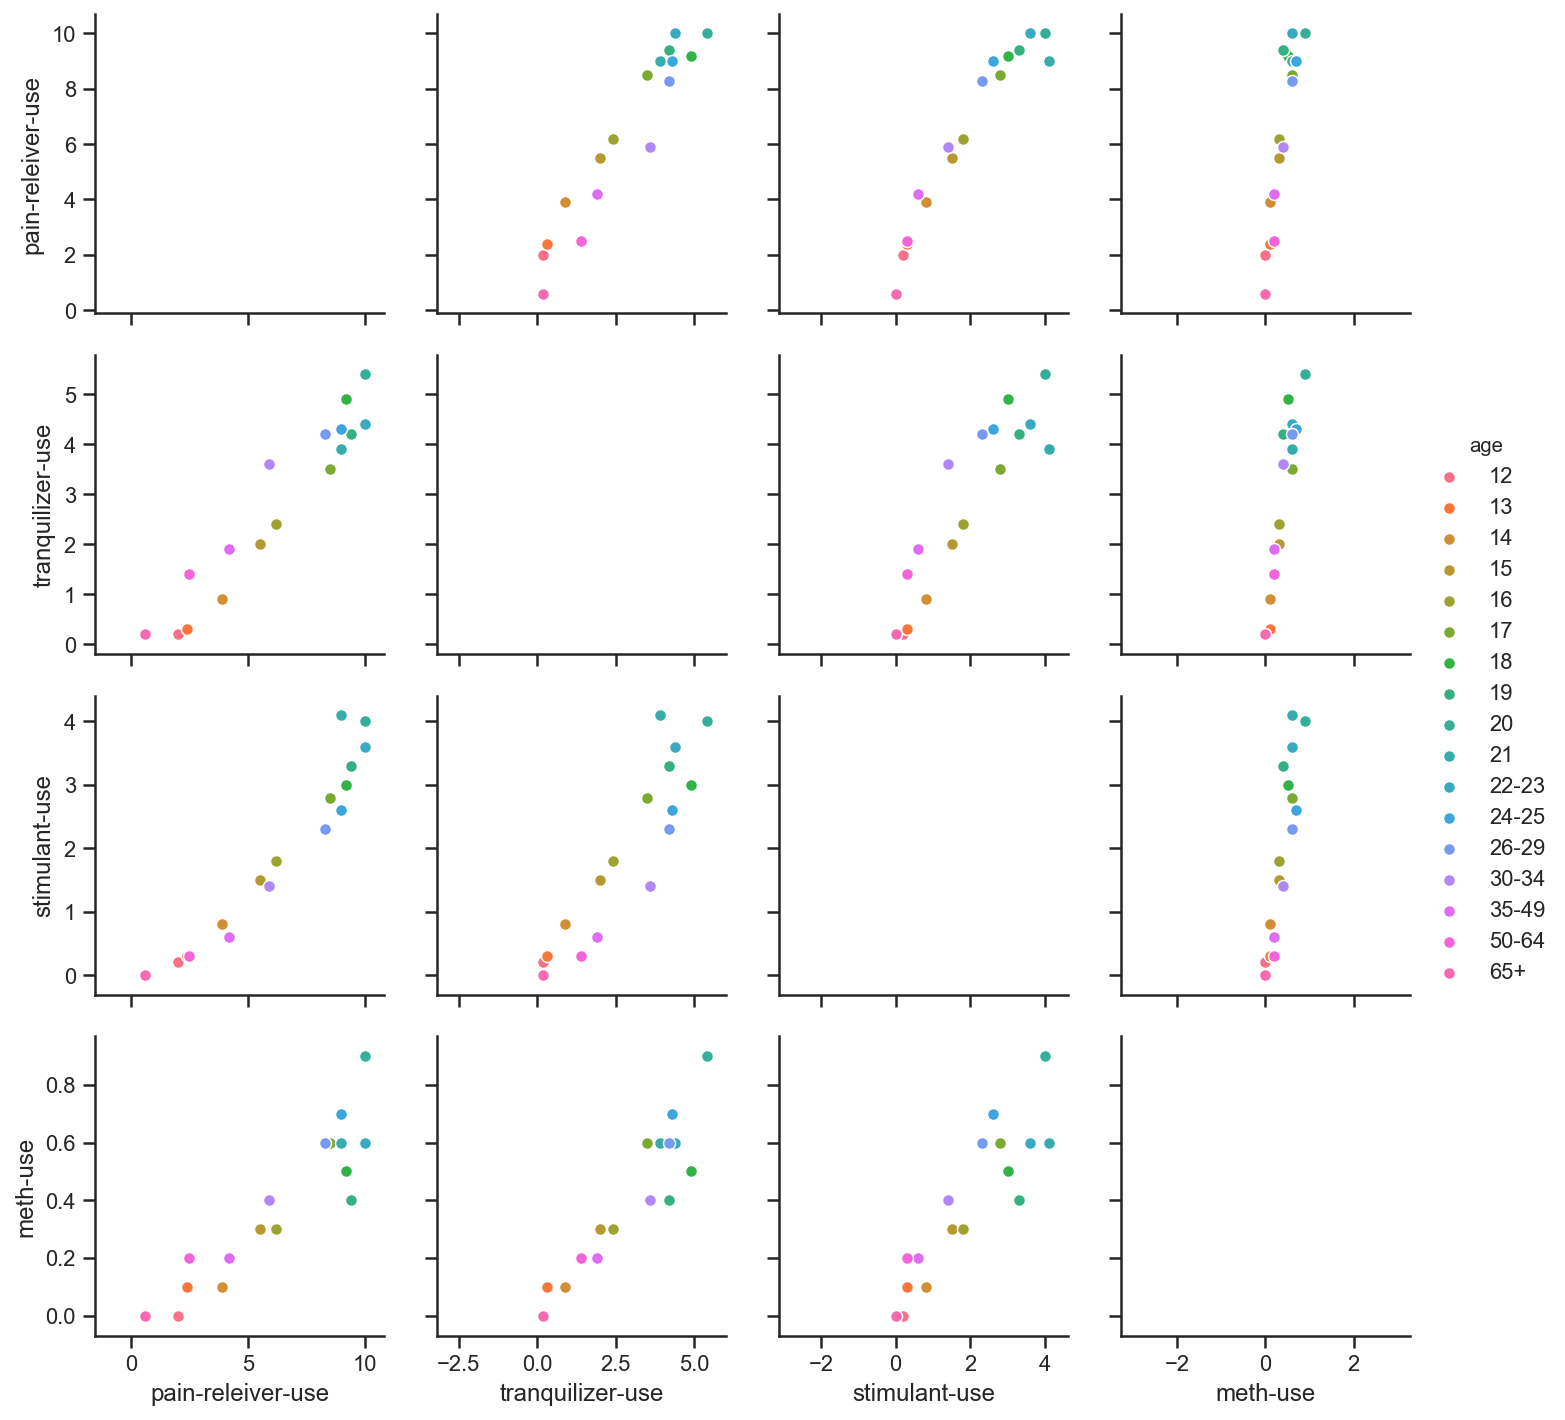

In [247]:
sns.pairplot(drug[['pain-releiver-use',
                  'tranquilizer-use',                               
                   'stimulant-use',
                    'meth-use',
                   'age']], hue = 'age')

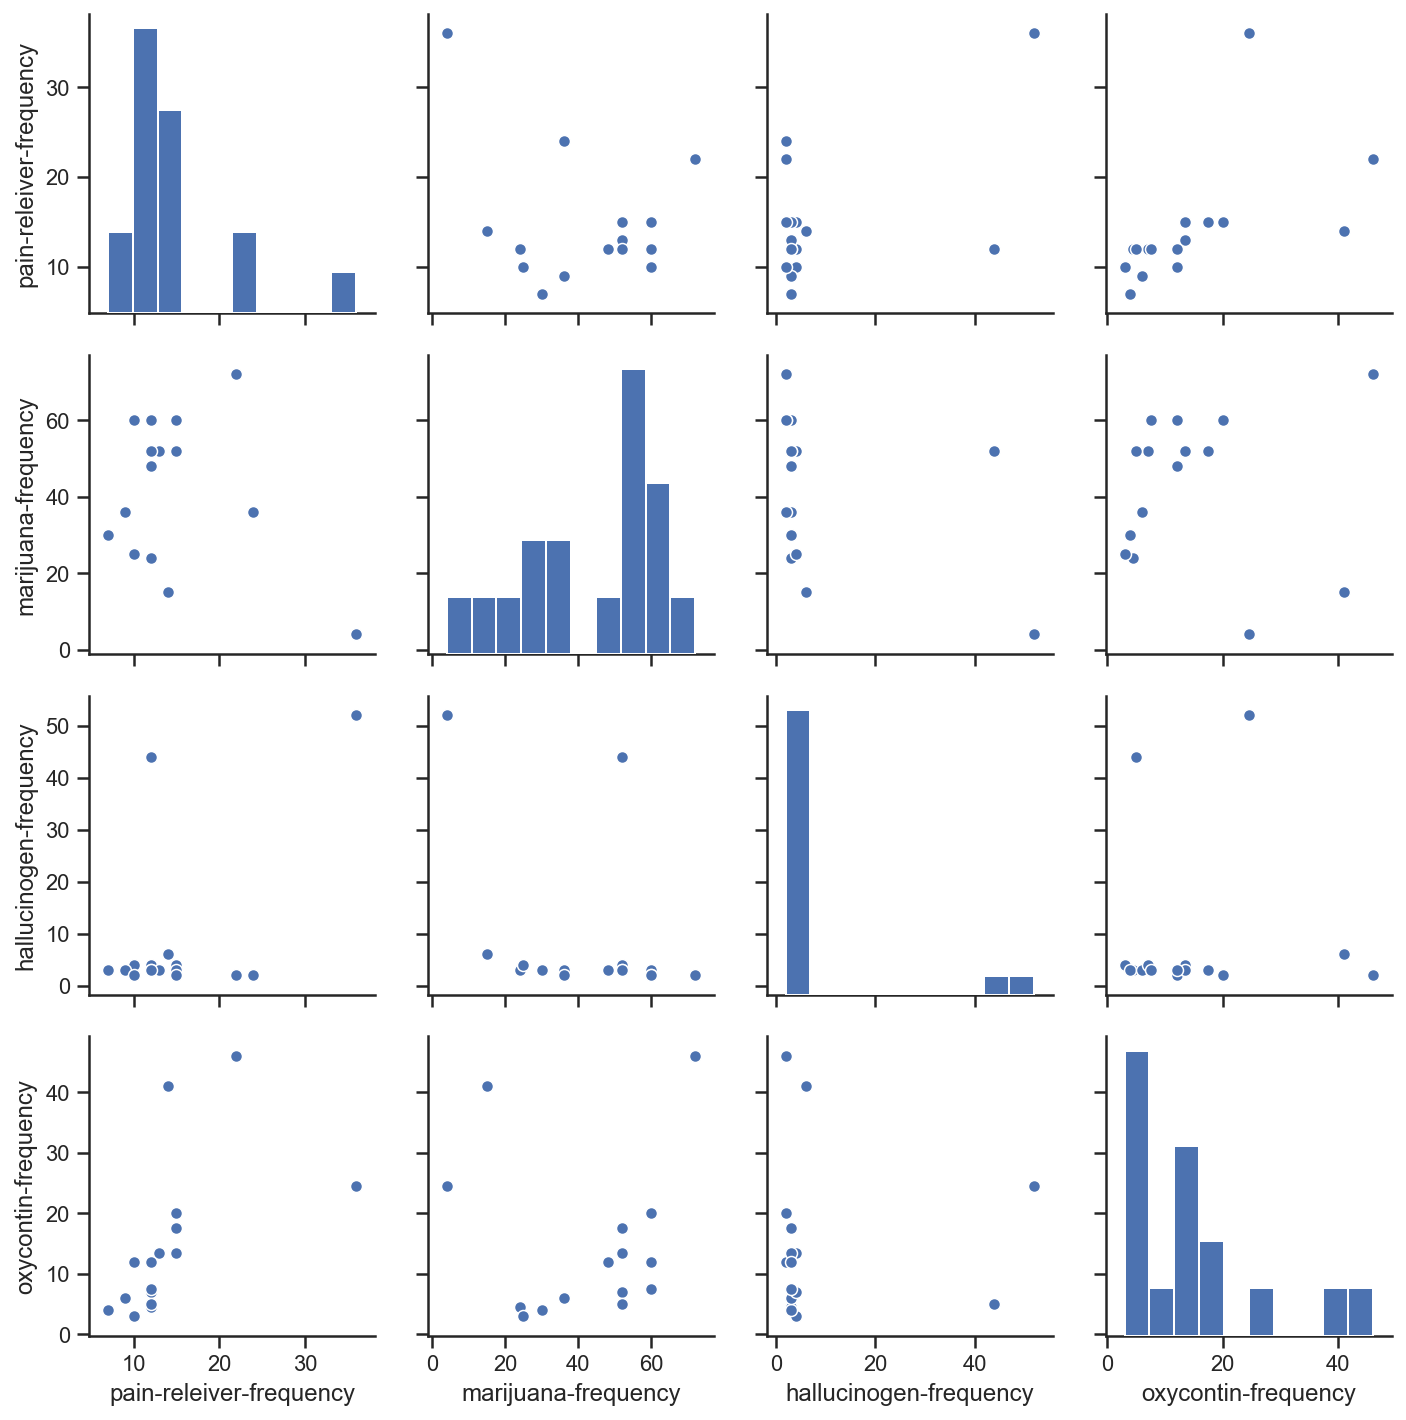

In [251]:
sns.pairplot(drug[['pain-releiver-frequency',
                    'marijuana-frequency',
                    'hallucinogen-frequency',
                    'oxycontin-frequency',
                    'age'
                    ]])

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


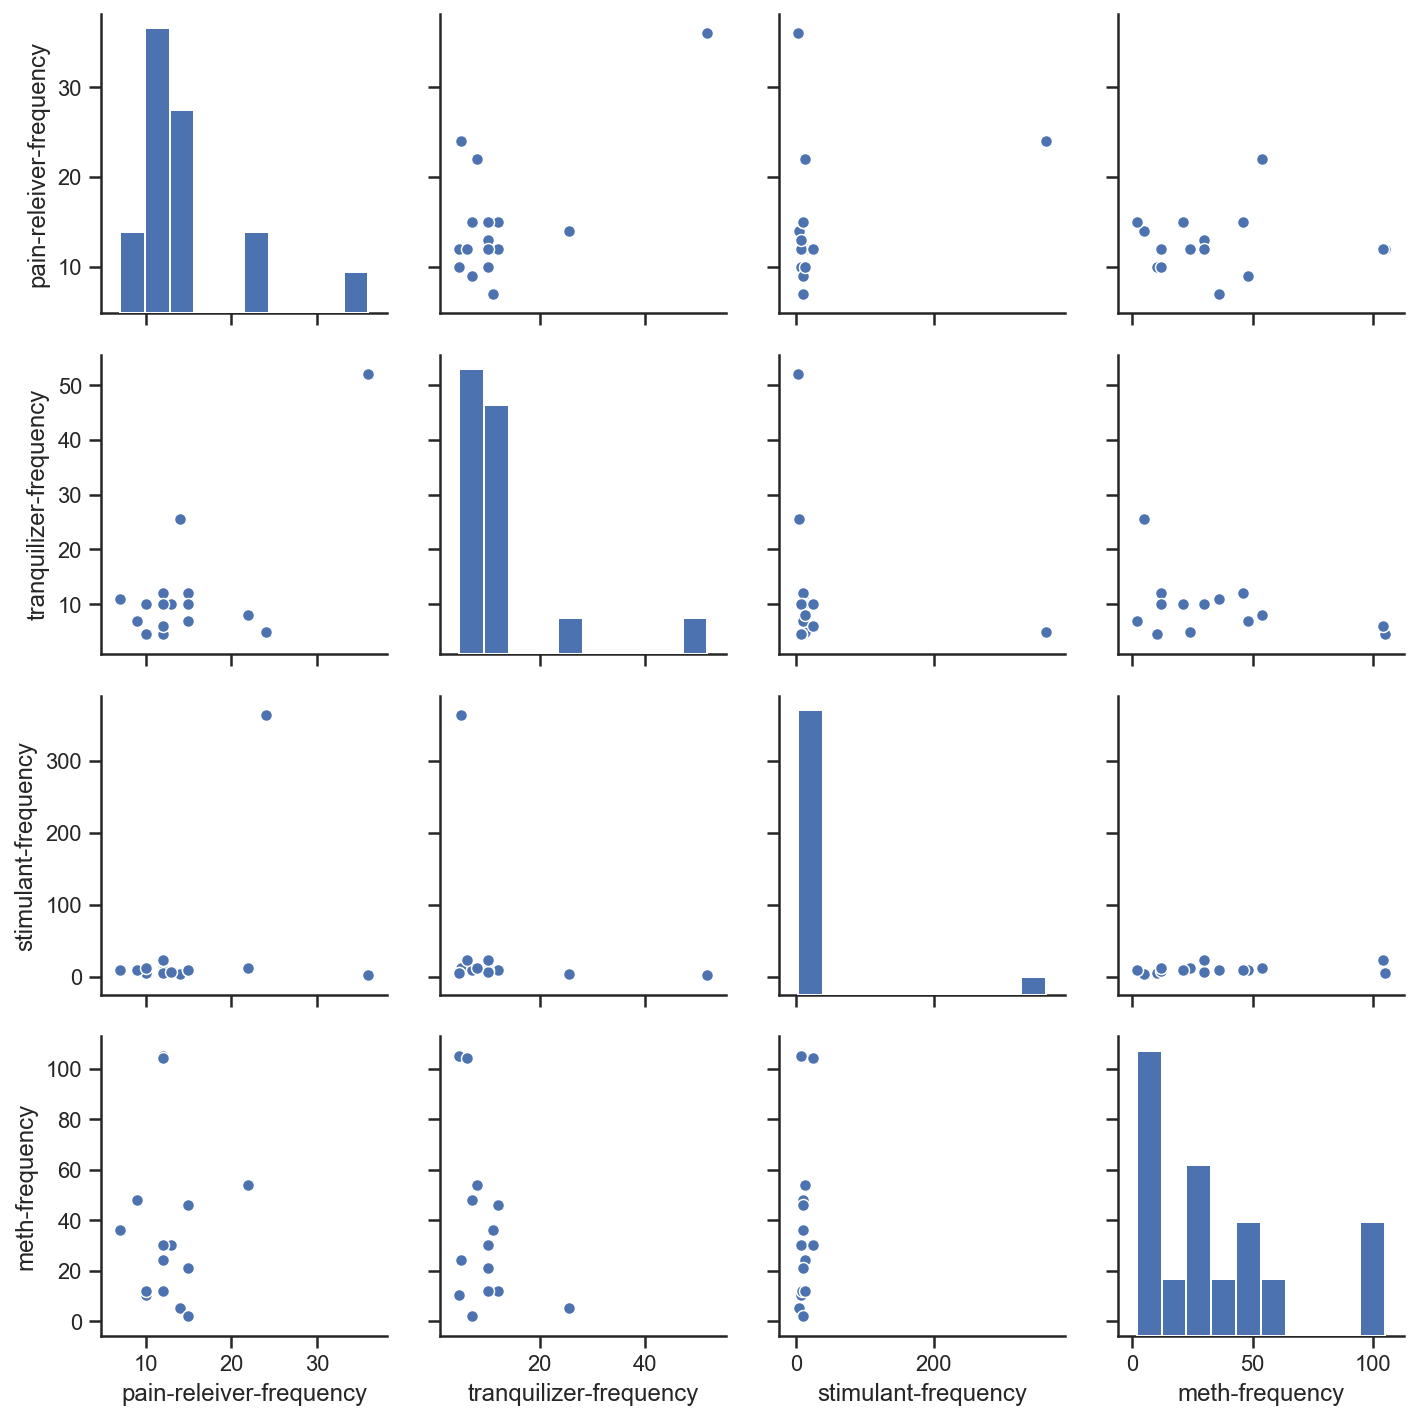

In [250]:
sns.pairplot(drug[['pain-releiver-frequency',
                   'tranquilizer-frequency',
                    'stimulant-frequency',
                    'meth-frequency',
                    'age'
                    ]])

### Hypothesis testing the drugs data

#### Is there a correlation between pain-releivers and recreational drug use?
   
   **H0** - There is no statistically significant relationship between prescribed pain-relief and recreational drug usage.

   **H1** - There is a statistically significant relationship between prescribed pain-relief and recreational drug usage. 

Plotted bootstrapped correlation co-efficients between pain-releivers and; marijuana-use, hallucinogen-use, oxycontin-use, tranquilizer-use, stimulant-use, meth-use.

In [28]:
drug.columns.values

array(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency',
       'crack-use', 'crack-frequency', 'heroin-use', 'heroin-frequency',
       'hallucinogen-use', 'hallucinogen-frequency', 'inhalant-use',
       'inhalant-frequency', 'pain-releiver-use',
       'pain-releiver-frequency', 'oxycontin-use', 'oxycontin-frequency',
       'tranquilizer-use', 'tranquilizer-frequency', 'stimulant-use',
       'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency', 'age_bin'], dtype=object)

In [30]:
# Extracting variables for bootstrapping

pain_releiver_boot = drug['pain-releiver-use'].values
pain_releiver_boot_elder = drug.loc[15:16,'pain-releiver-use'].values
marijuana_boot = drug['marijuana-use'].values
marijuana_boot_elder = drug.loc[15:16,'marijuana-use'].values
hallucinogen_boot = drug['hallucinogen-use'].values
hallucinogen_boot_elder = drug.loc[15:16,'hallucinogen-use'].values
oxycontin_boot = drug['oxycontin-use'].values
oxycontin_boot_elder = drug.loc[15:16,'oxycontin-use'].values
tranquilizer_boot = drug['tranquilizer-use'].values
tranquilizer_boot_elder = drug.loc[15:16,'tranquilizer-use'].values
stimulant_boot = drug['stimulant-use'].values
stimulant_boot_elder = drug.loc[15:16,'stimulant-use'].values
meth_boot = drug['meth-use'].values
meth_boot_elder = drug.loc[15:16,'meth-use'].values

In [31]:
# Calculating the Pearson Correlation Coefficient 
r_pain_mari = stats.pearsonr(pain_releiver_boot, marijuana_boot)[0]
r_pain_mari

0.9662258654129869

In [32]:
pain_releiver_boot

array([ 2. ,  2.4,  3.9,  5.5,  6.2,  8.5,  9.2,  9.4, 10. ,  9. , 10. ,
        9. ,  8.3,  5.9,  4.2,  2.5,  0.6])

In [33]:
marijuana_boot

array([ 1.1,  3.4,  8.7, 14.5, 22.5, 28. , 33.7, 33.4, 34. , 33. , 28.4,
       24.9, 20.8, 16.4, 10.4,  7.3,  1.2])

In [35]:
r_pain_mari_elder = stats.pearsonr(pain_releiver_boot_elder, marijuana_boot_elder)[0]
r_pain_mari_elder

1.0

In [36]:
r_pain_hall = stats.pearsonr(pain_releiver_boot, hallucinogen_boot)[0]
r_pain_hall

0.9093329159551877

In [37]:
r_pain_hall_elder = stats.pearsonr(pain_releiver_boot_elder, hallucinogen_boot_elder)[0]
r_pain_hall_elder

1.0

In [38]:
r_pain_oxyc = stats.pearsonr(pain_releiver_boot, oxycontin_boot)[0]
r_pain_oxyc

0.9764446814654524

In [39]:
r_pain_oxyc_elder = stats.pearsonr(pain_releiver_boot_elder, oxycontin_boot_elder)[0]
r_pain_oxyc_elder

1.0

In [40]:
r_pain_tran = stats.pearsonr(pain_releiver_boot, tranquilizer_boot)[0]
r_pain_tran

0.9592832360684838

In [41]:
r_pain_tran_elder = stats.pearsonr(pain_releiver_boot_elder, tranquilizer_boot_elder)[0]
r_pain_tran_elder

1.0

In [42]:
r_pain_stim = stats.pearsonr(pain_releiver_boot, stimulant_boot)[0]
r_pain_stim

0.9614837481931757

In [43]:
r_pain_stim_elder = stats.pearsonr(pain_releiver_boot_elder, stimulant_boot_elder)[0]
r_pain_stim_elder

1.0

In [44]:
r_pain_meth = stats.pearsonr(pain_releiver_boot, meth_boot)[0]
r_pain_meth

0.9180509746726225

In [45]:
r_pain_meth_elder = stats.pearsonr(pain_releiver_boot_elder, meth_boot_elder)[0]
r_pain_meth_elder

1.0

In [48]:
def bootstrap_r(x, y, iterations=10000):
    boot_r = []
    inds = list(range(len(x)))
    for i in range(iterations):
        boot_inds = np.random.choice(inds, replace=True, size=len(inds))
        x_b = x[boot_inds]
        y_b = y[boot_inds]
        boot_r.append(stats.pearsonr(x_b, y_b)[0])
    return boot_r

In [50]:
r_mari_boots = bootstrap_r(pain_releiver_boot, marijuana_boot)

# 95%
lower = stats.scoreatpercentile(r_mari_boots, 2.5)
upper = stats.scoreatpercentile(r_mari_boots, 97.5)

print('Lower Limit;',lower,'r;', r_pain_mari,'Upper Limit;', upper)

Lower Limit; 0.9331279089905979 r; 0.9662258654129869 Upper Limit; 0.9869169856942722


Text(0.5, 1.0, 'Distribution of Pearson Correlation Pain Relievers, Marijuana')

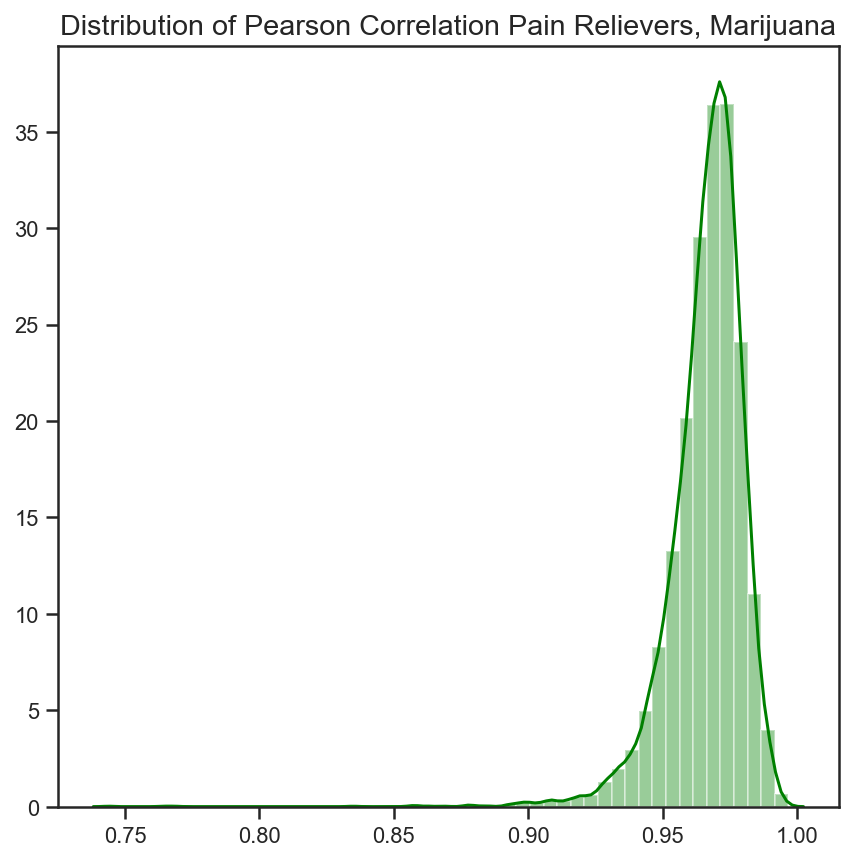

In [381]:
plt.figure(figsize=(7,7))
sns.distplot(r_mari_boots, color='green')
plt.title('Distribution of Pearson Correlation Pain Relievers, Marijuana', fontsize = 'x-large')

In [51]:
r_hall_boots = bootstrap_r(pain_releiver_boot, hallucinogen_boot)

# 95%
lower = stats.scoreatpercentile(r_hall_boots, 2.5)
upper = stats.scoreatpercentile(r_hall_boots, 97.5)

print(lower, r_pain_hall, upper)

0.8523902599075965 0.9093329159551877 0.9606147731778941


Text(0.5, 1.0, 'Distribution of Pearson Correlation Pain Relievers, Hallucinogen')

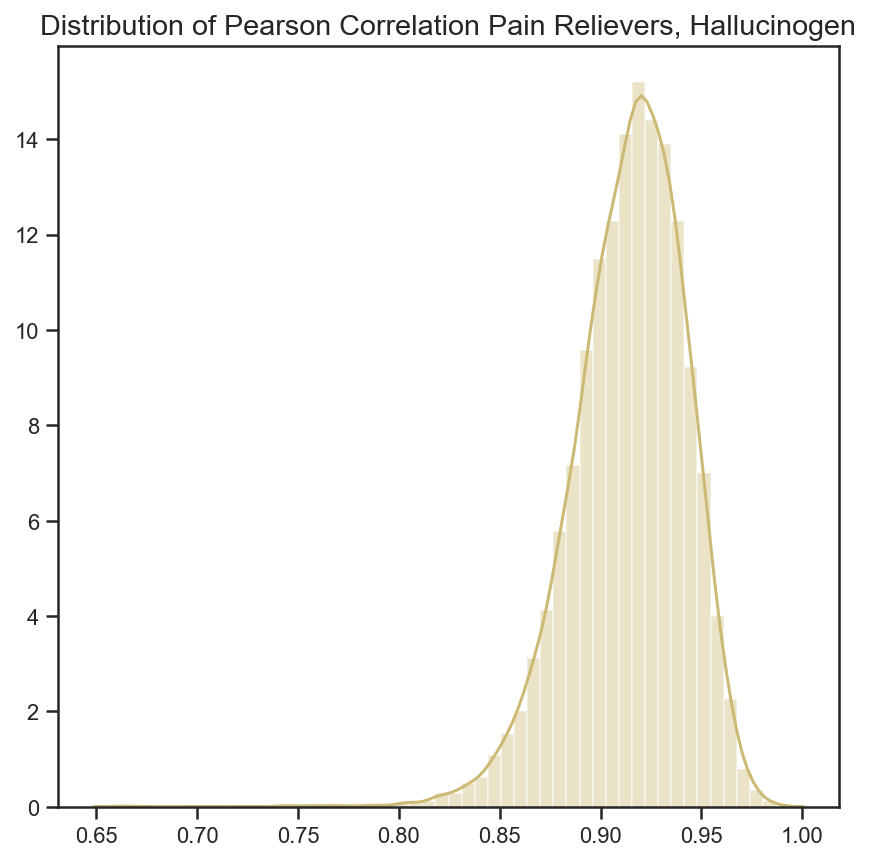

In [383]:
plt.figure(figsize=(7,7))
sns.distplot(r_hall_boots, color='y')
plt.title('Distribution of Pearson Correlation Pain Relievers, Hallucinogen', fontsize = 'x-large')

In [53]:
r_oxyc_boots = bootstrap_r(pain_releiver_boot, oxycontin_boot)

# 95%
lower = stats.scoreatpercentile(r_oxyc_boots, 2.5)
upper = stats.scoreatpercentile(r_oxyc_boots, 97.5)

print(lower, r_pain_oxyc, upper)

0.9568496290120739 0.9764446814654524 0.9900288126139914


Text(0.5, 1.0, 'Distribution of Pearson Correlation Pain Relievers, Oxycontin')

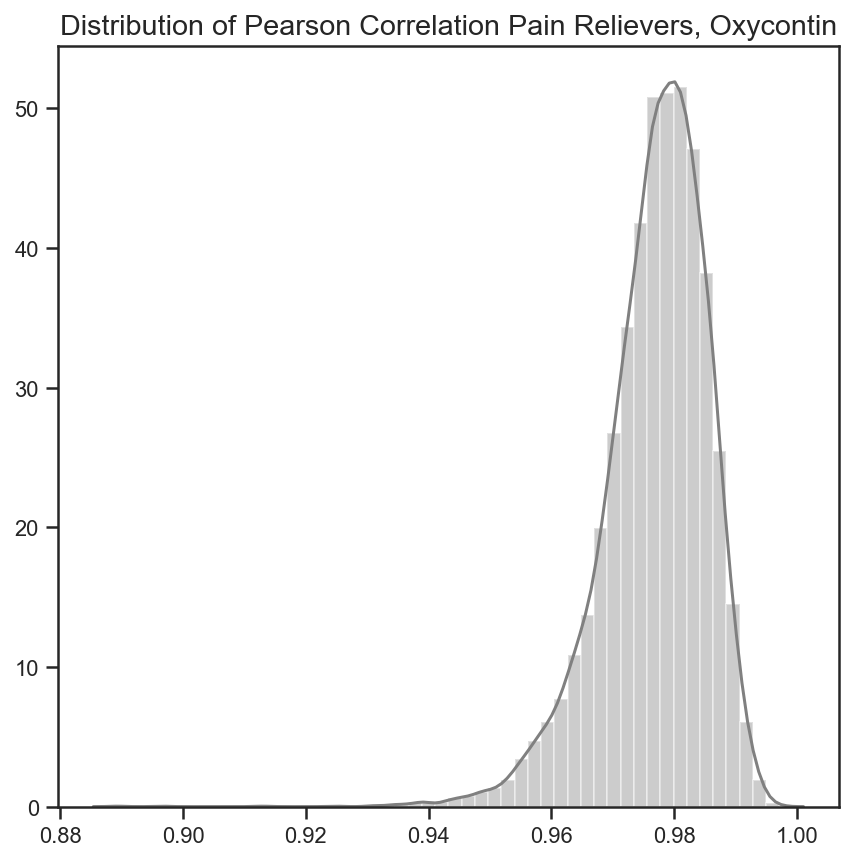

In [385]:
plt.figure(figsize=(7,7))
sns.distplot(r_oxyc_boots, color='grey')
plt.title('Distribution of Pearson Correlation Pain Relievers, Oxycontin', fontsize = 'x-large')

In [54]:
r_tran_boots = bootstrap_r(pain_releiver_boot, tranquilizer_boot)

# 95%
lower = stats.scoreatpercentile(r_tran_boots, 2.5)
upper = stats.scoreatpercentile(r_tran_boots, 97.5)

print(lower, r_pain_tran, upper)

0.9197673660142406 0.9592832360684838 0.9816544973136708


Text(0.5, 1.0, 'Distribution of Pearson Correlation Pain Relievers, Tranquilizer')

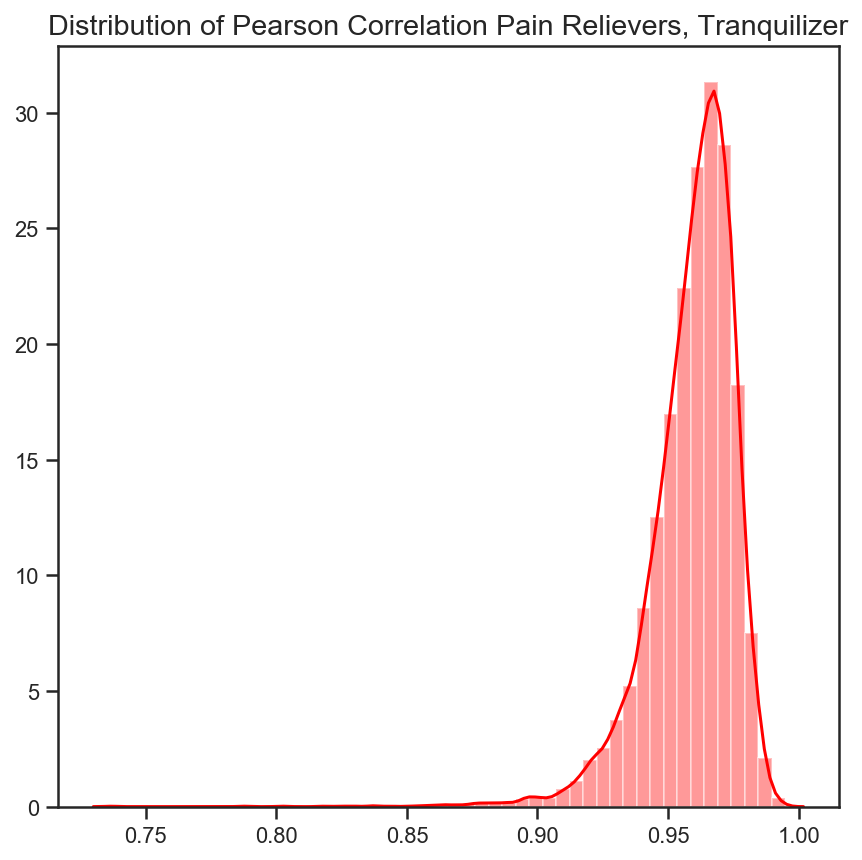

In [387]:
plt.figure(figsize=(7,7))
sns.distplot(r_tran_boots, color='red')
plt.title('Distribution of Pearson Correlation Pain Relievers, Tranquilizer', fontsize = 'x-large')

In [55]:
r_stim_boots = bootstrap_r(pain_releiver_boot, stimulant_boot)

# 95%
lower = stats.scoreatpercentile(r_stim_boots, 2.5)
upper = stats.scoreatpercentile(r_stim_boots, 97.5)

print(lower, r_pain_stim, upper)

0.9280382765385314 0.9614837481931757 0.9881086269129098


Text(0.5, 1.0, 'Distribution of Pearson Correlation Pain Relievers, Stimulant')

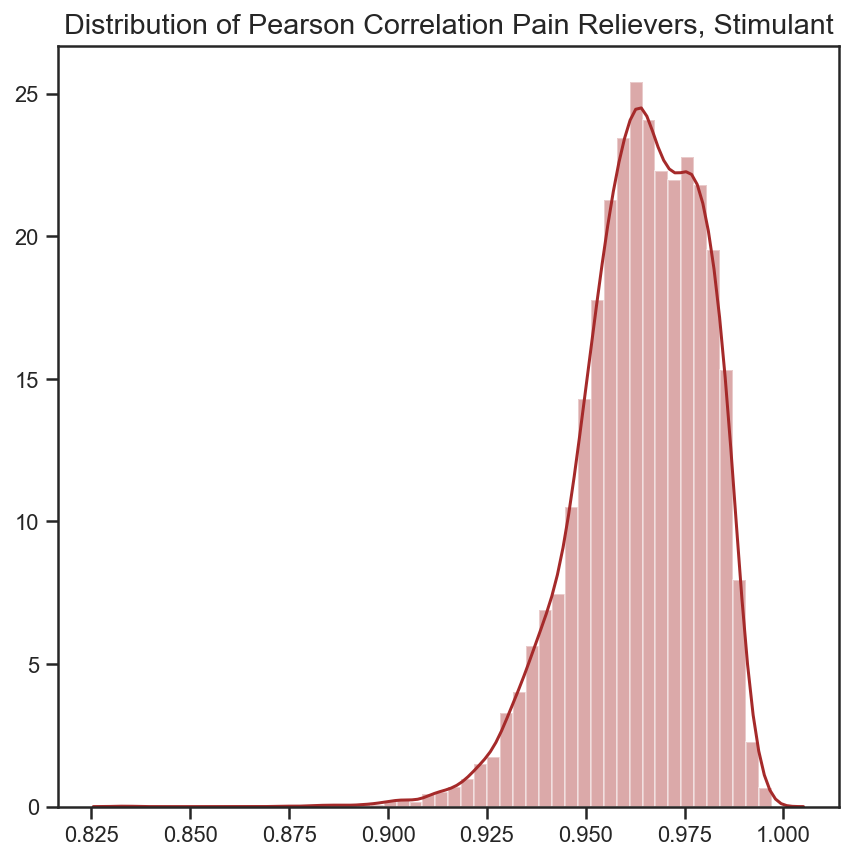

In [389]:
plt.figure(figsize=(7,7))
sns.distplot(r_stim_boots, color='brown')
plt.title('Distribution of Pearson Correlation Pain Relievers, Stimulant', fontsize = 'x-large')

In [56]:
r_meth_boots = bootstrap_r(pain_releiver_boot, meth_boot)

# 95%
lower = stats.scoreatpercentile(r_meth_boots, 2.5)
upper = stats.scoreatpercentile(r_meth_boots, 97.5)

print(lower, r_pain_meth, upper)

0.8397339848919388 0.9180509746726225 0.970253513843766


Text(0.5, 1.0, 'Distribution of Pearson Correlation Pain Relievers, Meth')

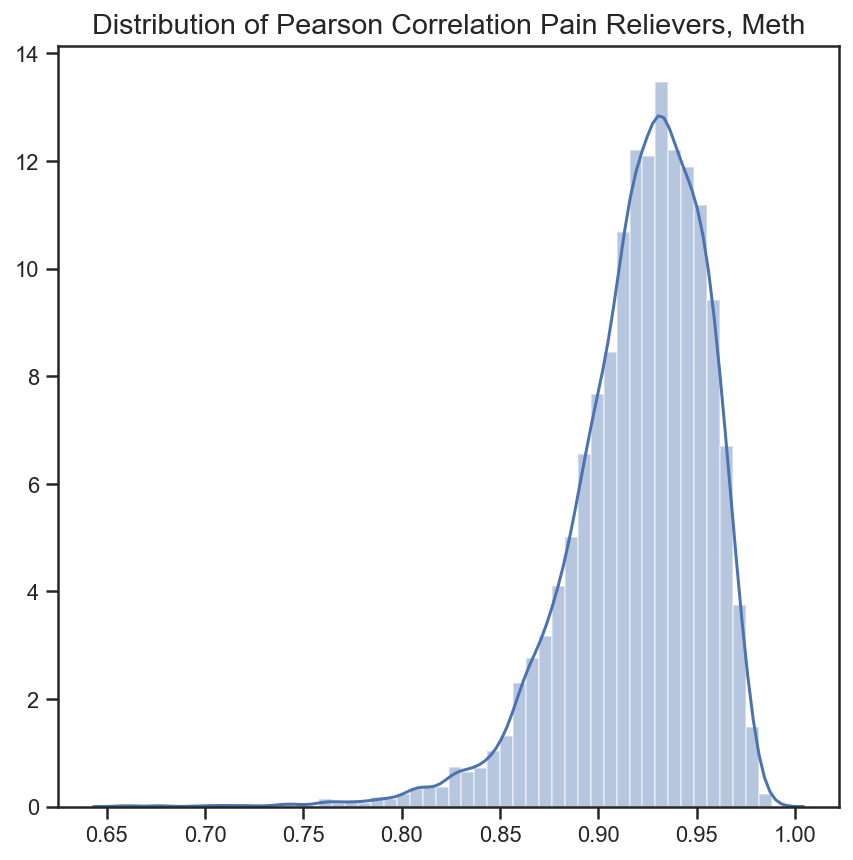

In [391]:
plt.figure(figsize=(7,7))
sns.distplot(r_meth_boots)
plt.title('Distribution of Pearson Correlation Pain Relievers, Meth', fontsize = 'x-large')

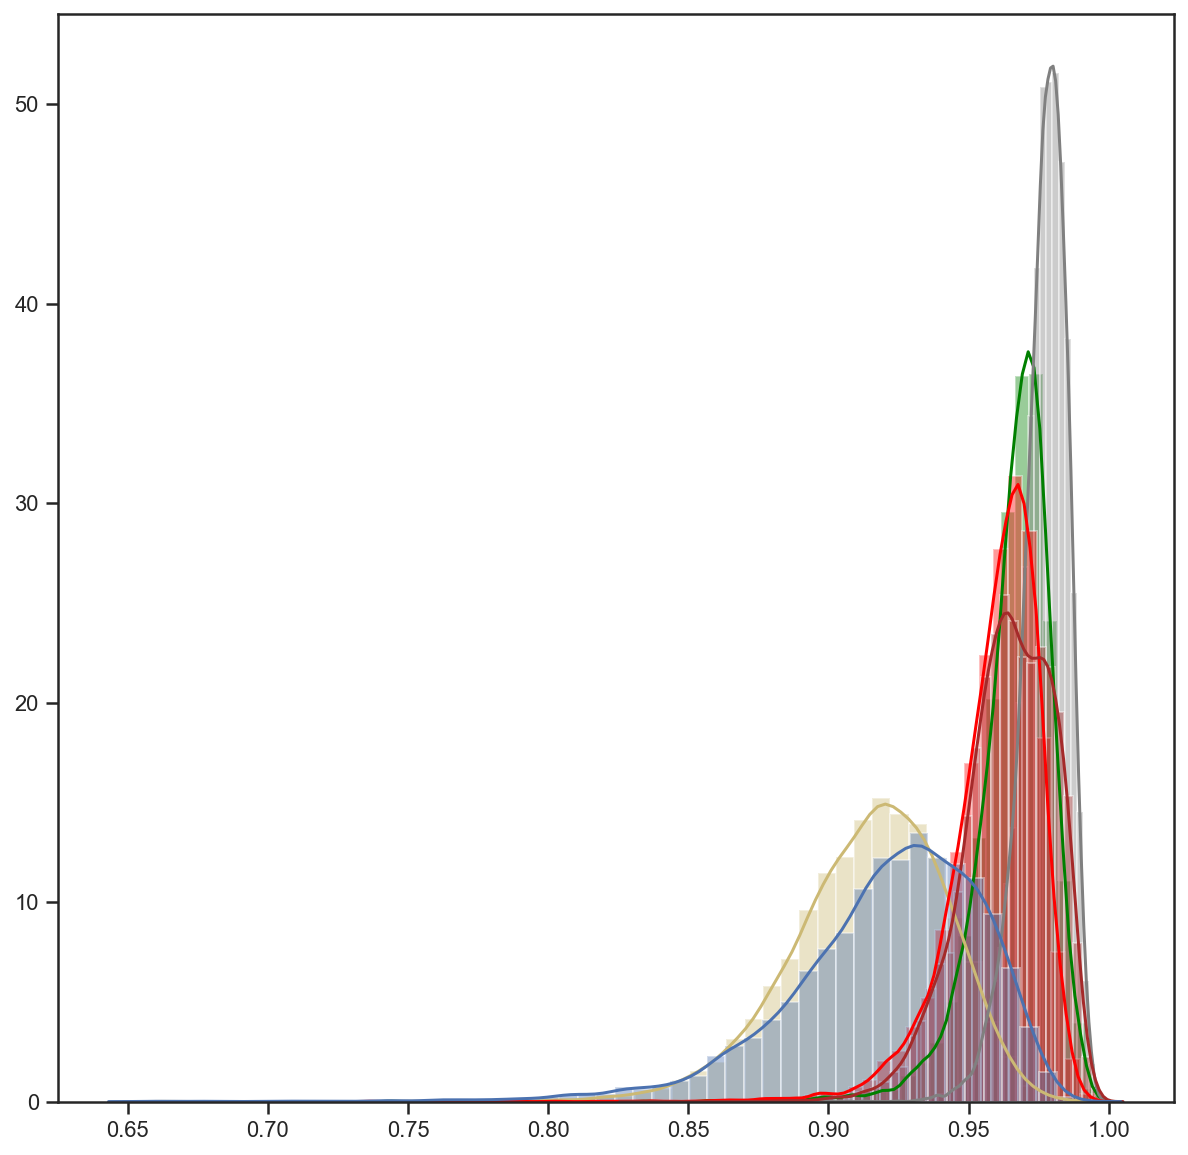

In [409]:
ax = plt.figure(figsize=(10,10))
# legend = ax.legend(loc=1, bbox_to_anchor=(1, 0.5, 0.05, 0.5),
#                     fancybox=True,shadow=True,title='')
# ax.legend(handles=(r_mari_boots, r_hall_boots, r_oxyc_boots, r_pain_tran, r_pain_stim, r_pain_meth),
#           labels=('Marijuana','Hallucinogen','Oxycontin','Tranquilizer','Stimulant','Meth'))
# plt.legend((r_mari_boots, r_hall_boots, r_oxyc_boots, r_pain_tran, r_pain_stim, r_pain_meth),
#            ('Marijuana','Hallucinogen','Oxycontin','Tranquilizer','Stimulant','Meth'))
sns.distplot(r_mari_boots, color='green')
sns.distplot(r_hall_boots, color='y')
sns.distplot(r_oxyc_boots, color='grey')
sns.distplot(r_tran_boots, color='red')
sns.distplot(r_stim_boots, color='brown')
sns.distplot(r_meth_boots)

**Report**

With 15 degrees of freedom and a 95% confidence interval, we can reject H0 for all tested recreational drugs as r > 0.482.

Therefore, there is a statistically significant relationship between prescribed pain-relief and recreational drug usage within marijuana, hallucinogen, oxycontin, tranquilizer, stimulant, & meth usage.

## Dealing with outliers
---

In [134]:
SAT_rate = SAT_csv_df['Rate']

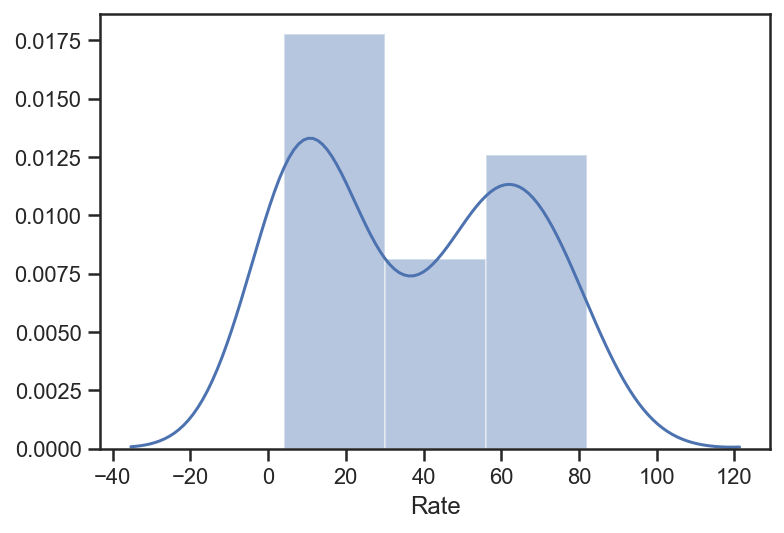

In [72]:
# Checking the distribution of the SAT Rate
sns.distplot(SAT_rate)

In [130]:
rate_mean, rate_std = np.mean(SAT_rate), np.std(SAT_rate)
cutoff_sd = rate_std * 3
rate_lower, rate_higher = rate_mean - cutoff_sd, rate_mean + cutoff_sd
outliers_sd = [x for x in SAT_rate if x < rate_lower or x > rate_higher]
outliers_sd

[]

The SAT `Rate` is not a Gausian distribution so we would not be able to detect outliers using the Standard Deviation method. In it's place we have the IQR 'Interquartile Range Method'.

### Interquartile Method

In [80]:
#Calculate the inter-quartile range
q25, q75 = np.percentile(SAT_rate, 25), np.percentile(SAT_rate, 75)
iqr = q75 - q25
iqr

54.5

In [133]:
cutoff = iqr * 1.5
lower, upper = q25 - cutoff, q75 + cutoff
outliers = [x for x in SAT_rate if x < lower or x > upper]
outliers

[]

Using both methods of Standard Deviation and IQR, there are no outliers identified. 

## Percentile scoring and Spearman Rank Correlation

---

### Calculating the spearman correlation of sat `Verbal` and `Math`

In [135]:
stats.spearmanr(SAT_csv_df['Verbal'], SAT_csv_df['Math'])

SpearmanrResult(correlation=0.9052048847940284, pvalue=3.235231959777518e-20)

In [136]:
stats.pearsonr(SAT_csv_df['Verbal'], SAT_csv_df['Math'])

(0.899870852544429, 1.1920026733067636e-19)

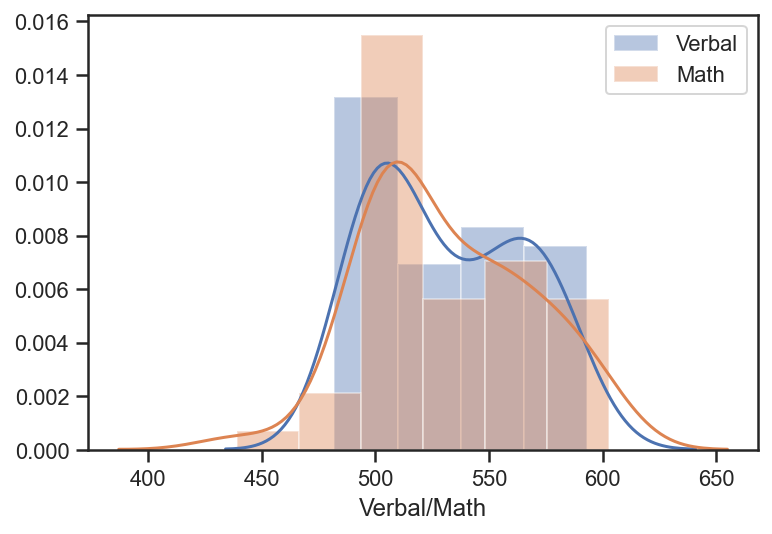

In [144]:
sns.distplot(SAT_csv_df['Verbal'])
sns.distplot(SAT_csv_df['Math'])
plt.xlabel("Verbal/Math")
plt.legend(['Verbal', 'Math'])

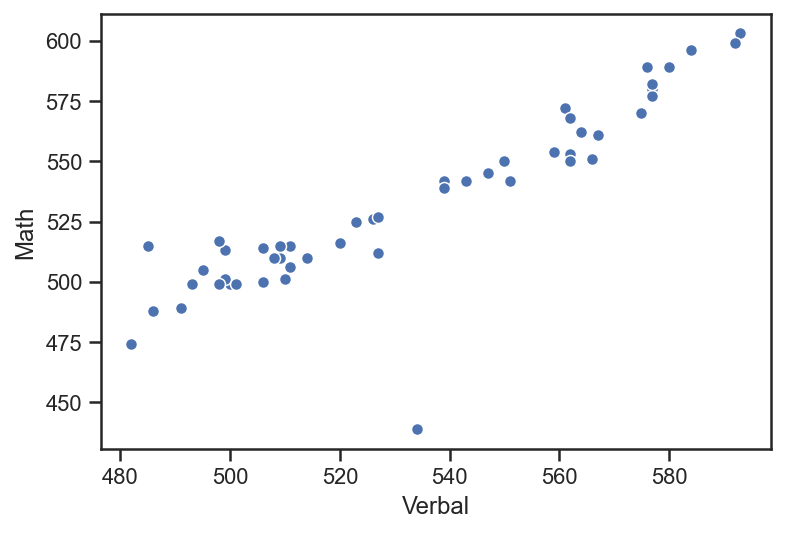

In [145]:
sns.scatterplot(SAT_csv_df['Verbal'], SAT_csv_df['Math'])

The Pearson correlation assumes normality for the distributions. Whereas, Spearmans correlation does not assume anormality. The distribution plots show bimodal distributions, and the scatter plot shows a strong positive linear relationship between the two scores of `Verbal` and `Math`. Which can explain the scoring of 0.90 from the Spearman Rank Correlation, and 0.899 from the Pearson Correlation.

If the relationship between both of the scores was non-linear we can expect a poor Pearson score, whereas the Spearmans Correlation would capture the non-linearity. 

### Percentile scoring

In [147]:
percentiles = []

for i in SAT_csv_df['Rate']:
    percentiles.append(np.percentile(SAT_csv_df['Rate'],i))
    
SAT_csv_df['Percentile'] = percentiles

In [171]:
print('California Percentile Score:',SAT_csv_df.iloc[23, 4])

California Percentile Score: 34.110000000000014


Spearmans Rank and Percentile Score is related as they both involve ranking each variable.

### Percentiles and outliers

We can try to use percentile scoring to identify outliers by stating a threshold of any data that we wish to catergorise as an outlier. 

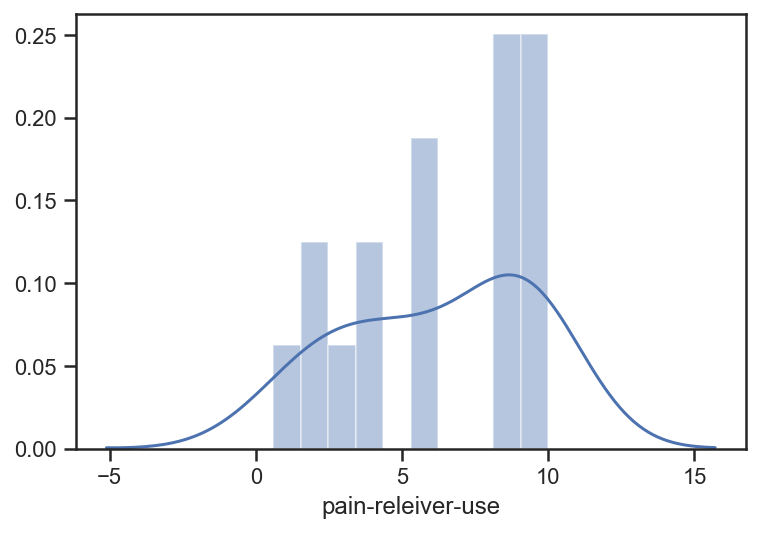

In [180]:
sns.distplot(drug['pain-releiver-use'], bins=10)

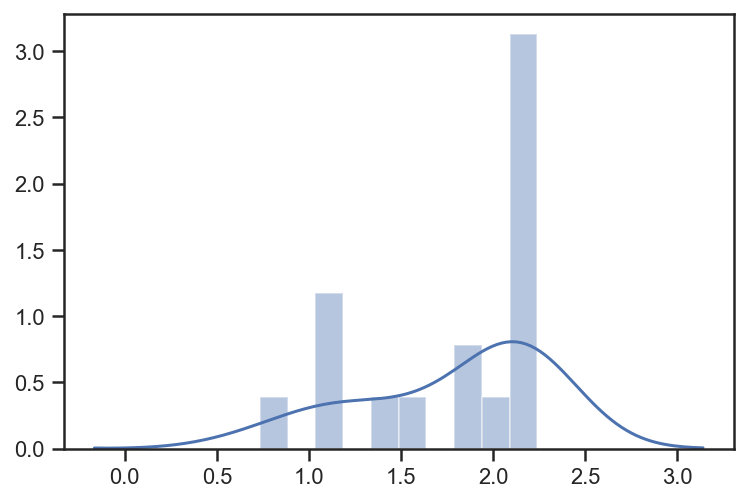

In [181]:
pain_percentile = []

for i in drug['pain-releiver-use']:
    pain_percentile.append(np.percentile(drug['pain-releiver-use'],i))
    
sns.distplot(pain_percentile, bins=10)